[Table of Contents](./table_of_contents.ipynb)

# Probabilities, Gaussians, and Bayes' Theorem

In [194]:
%matplotlib inline

In [195]:
#format the book
import book_format
book_format.set_style()

## Introduction

The last chapter ended by discussing some of the drawbacks of the Discrete Bayesian filter. For many tracking and filtering problems our desire is to have a filter that is *unimodal* and *continuous*. That is, we want to model our system using floating point math (continuous) and to have only one belief represented (unimodal). For example, we want to say an aircraft is at (12.34, -95.54, 2389.5) where that is latitude, longitude, and altitude. We do not want our filter to tell us "it might be at (1.65, -78.01, 2100.45) or it might be at (34.36, -98.23, 2543.79)." That doesn't match our physical intuition of how the world works, and as we discussed, it can be prohibitively expensive to compute the multimodal case. And, of course, multiple position estimates makes navigating impossible.

We desire a unimodal, continuous way to represent probabilities that models how the real world works, and that is computationally efficient to calculate. Gaussian distributions provide all of these features.

Последняя глава завершилась обсуждением некоторых недостатков дискретного байесовского фильтра. Для многих задач отслеживания и фильтрации мы хотим иметь фильтр, который является *унимодальным* и *непрерывным*. То есть, мы хотим смоделировать нашу систему с использованием математики с плавающей точкой (непрерывно) и иметь только одно представленное убеждение (унимодально). Например, мы хотим сказать, что самолет находится в точке (12.34, -95.54, 2389.5), где это широта, долгота и высота. Мы не хотим, чтобы наш фильтр говорил нам: «Он может быть в точке (1.65, -78.01, 2100.45) или в точке (34.36, -98.23, 2543.79)». Это не соответствует нашей физической интуиции о том, как работает мир, и, как мы обсуждали, вычисление многомодального случая может быть непомерно дорогим. И, конечно, множественные оценки положения делают навигацию невозможной.

Мы хотим иметь унимодальный, непрерывный способ представления вероятностей, который моделирует, как работает реальный мир, и который является вычислительно эффективным для расчета. Гауссовские распределения предоставляют все эти возможности.

## Mean, Variance, and Standard Deviations

Most of you will have had exposure to statistics, but allow me to cover this material anyway. I ask that you read the material even if you are sure you know it well. I ask for two reasons. First, I want to be sure that we are using terms in the same way. Second, I strive to form an intuitive understanding of statistics that will serve you well in later chapters. It's easy to go through a stats course and only remember the formulas and calculations, and perhaps be fuzzy on the implications of what you have learned.

Большинство из вас уже сталкивались со статистикой, но позвольте мне все равно осветить этот материал. Я прошу вас прочитать материал, даже если вы уверены, что хорошо его знаете. Я прошу по двум причинам. Во-первых, я хочу быть уверен, что мы используем термины одинаково. Во-вторых, я стремлюсь сформировать интуитивное понимание статистики, которое пригодится вам в последующих главах. Легко пройти курс статистики и запомнить только формулы и расчеты, и, возможно, не иметь четкого представления о последствиях того, что вы узнали.

### Random Variables

Each time you roll a die the *outcome* will be between 1 and 6. If we rolled a fair die a million times we'd expect to get a one 1/6 of the time. Thus we say the *probability*, or *odds* of the outcome 1 is 1/6. Likewise, if I asked you the chance of 1 being the result of the next roll you'd reply 1/6.  

This combination of values and associated probabilities is called a [*random variable*](https://en.wikipedia.org/wiki/Random_variable). Here *random* does not mean the process is nondeterministic, only that we lack information about the outcome. The result of a die toss is deterministic, but we lack enough information to compute the result. We don't know what will happen, except probabilistically.

While we are defining terms, the range of values is called the [*sample space*](https://en.wikipedia.org/wiki/Sample_space). For a die the sample space is {1, 2, 3, 4, 5, 6}. For a coin the sample space is {H, T}. *Space* is a mathematical term which means a set with structure. The sample space for the die is a subset of the natural numbers in the range of 1 to 6.

Another example of a random variable is the heights of students in a university. Here the sample space is a range of values in the real numbers between two limits defined by biology.

Random variables such as coin tosses and die rolls are *discrete random variables*. This means their sample space is represented by either a finite number of values or a countably infinite number of values such as the natural numbers. Heights of humans are called *continuous random variables* since they can take on any real value between two limits.

Do not confuse the *measurement* of the random variable with the actual value. If we can only measure the height of a person to 0.1 meters we would only record values from 0.1, 0.2, 0.3...2.7, yielding 27 discrete choices. Nonetheless a person's height can vary between any arbitrary real value between those ranges, and so height is a continuous random variable. 

In statistics capital letters are used for random variables, usually from the latter half of the alphabet. So, we might say that $X$ is the random variable representing the die toss, or $Y$ are the heights of the students in the freshmen poetry class. Later chapters use linear algebra to solve these problems, and so there we will follow the convention of using  lower case for vectors, and upper case for matrices. Unfortunately these conventions clash, and you will have to determine which an author is using from context. I always use bold symbols for vectors and matrices, which helps distinguish between the two.

Каждый раз, когда вы бросаете игральную кость, *результат* будет между 1 и 6. Если бы мы бросали честную игральную кость миллион раз, мы бы ожидали получить 1 в 1/6 случаев. Таким образом, мы говорим, что *вероятность* или *шанс* результата 1 составляет 1/6. Аналогично, если бы я спросил вас о вероятности того, что 1 будет результатом следующего броска, вы бы ответили 1/6.

Эта комбинация значений и связанных с ними вероятностей называется [*случайной величиной*](https://en.wikipedia.org/wiki/Случайная_переменная). Здесь *случайность* не означает, что процесс недетерминирован, а означает только то, что у нас нет информации о результате. Результат броска игральной кости детерминирован, но у нас недостаточно информации, чтобы вычислить результат. Мы не знаем, что произойдет, кроме как вероятностно.

Пока мы определяем термины, диапазон значений называется [*пространством выборки*](https://en.wikipedia.org/wiki/Sample_space). Для игральной кости пространство выборки равно {1, 2, 3, 4, 5, 6}. Для монеты пространство выборки равно {H, T}. *Пространство* — это математический термин, который означает множество со структурой. Пространство выборки для игральной кости — это подмножество натуральных чисел в диапазоне от 1 до 6.

Другим примером случайной величины является рост студентов в университете. Здесь пространство выборки — это диапазон значений действительных чисел между двумя пределами, определенными биологией.

Случайные величины, такие как подбрасывание монеты и броски игральной кости, являются *дискретными случайными величинами*. Это означает, что их пространство выборки представлено либо конечным числом значений, либо счетным бесконечным числом значений, таких как натуральные числа. Рост людей называется *непрерывной случайной величиной*, поскольку он может принимать любое действительное значение между двумя пределами.

Не путайте *измерение* случайной величины с фактическим значением. Если бы мы могли измерить рост человека только до 0,1 метра, мы бы записали только значения от 0,1, 0,2, 0,3...2,7, что дало бы 27 дискретных вариантов. Тем не менее, рост человека может варьироваться между любым произвольным действительным значением в этих диапазонах, и поэтому рост является непрерывной случайной величиной.

В статистике для случайных величин используются заглавные буквы, обычно из второй половины алфавита. Таким образом, мы могли бы сказать, что $X$ — это случайная величина, представляющая подбрасывание игральной кости, или $Y$ — это рост студентов на уроках поэзии для первокурсников. В последующих главах для решения этих задач используется линейная алгебра, и поэтому там мы будем следовать соглашению об использовании нижнего регистра для векторов и верхнего регистра для матриц. К сожалению, эти соглашения конфликтуют, и вам придется определять, что использует автор из контекста. Я всегда использую жирные символы для векторов и матриц, что помогает различать их.

## Probability Distribution


The [*probability distribution*](https://en.wikipedia.org/wiki/Probability_distribution) gives the probability for the random variable to take any value in a sample space. For example, for a fair six sided die we might say:

[*Распределение вероятностей*](https://en.wikipedia.org/wiki/Распределение_вероятностей) дает вероятность того, что случайная величина примет любое значение в пространстве выборки. Например, для честной шестигранной кости мы могли бы сказать:

|Value|Probability|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

We denote this distribution with a lower case p: $p(x)$. Using ordinary function notation, we would write:

$$P(X{=}4) = p(4) = \frac{1}{6}$$

This states that the probability of the die landing on 4 is $\frac{1}{6}$. $P(X{=}x_k)$ is notation for "the probability of $X$ being $x_k$". Note the subtle notational difference. The capital $P$ denotes the probability of a single event, and the lower case $p$ is the probability distribution function. This can lead you astray if you are not observent. Some texts use $Pr$ instead of $P$ to ameliorate this. 

Another example is a fair coin. It has the sample space {H, T}. The coin is fair, so the probability for heads (H) is 50%, and the probability for tails (T) is 50%. We write this as

$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

Sample spaces are not unique. One sample space for a die is {1, 2, 3, 4, 5, 6}. Another valid sample space would be {even, odd}. Another might be {dots in all corners, not dots in all corners}. A sample space is valid so long as it covers all possibilities, and any single event is described by only one element.  {even, 1, 3, 4, 5} is not a valid sample space for a die since a value of 4 is matched both by 'even' and '4'.

The probabilities for all values of a *discrete random value* is known as the *discrete probability distribution* and the probabilities for all values of a *continuous random value* is known as the *continuous probability distribution*.

To be a probability distribution the probability of each value $x_i$ must be $x_i \ge 0$, since no probability can be less than zero. Secondly, the sum of the probabilities for all values must equal one. This should be intuitively clear for a coin toss: if the odds of getting heads is 70%, then the odds of getting tails must be 30%. We formulize this requirement as

$$\sum\limits_u P(X{=}u)= 1$$

for discrete distributions, and as 

$$\int\limits_u P(X{=}u) \,du= 1$$

for continuous distributions.

In the previous chapter we used probability distributions to estimate the position of a dog in a hallway. For example:

Мы обозначаем это распределение строчной буквой p: $p(x)$. Используя обычную нотацию функций, мы бы записали:

$$P(X{=}4) = p(4) = \frac{1}{6}$$

Это означает, что вероятность выпадения кости на 4 равна $\frac{1}{6}$. $P(X{=}x_k)$ — это нотация для «вероятности того, что $X$ будет $x_k$». Обратите внимание на тонкую разницу в обозначениях. Заглавная буква $P$ обозначает вероятность одного события, а строчная буква $p$ — это функция распределения вероятностей. Это может сбить вас с толку, если вы не наблюдательны. В некоторых текстах вместо $P$ используется $Pr$, чтобы это исправить.

Другой пример — честная монета. Она имеет выборочное пространство {H, T}. Монета честная, поэтому вероятность выпадения орла (H) составляет 50%, а вероятность выпадения решки (T) составляет 50%. Мы записываем это как

$$\begin{gathered}P(X{=}H) = 0,5\\P(X{=}T)=0,5\end{gathered}$$

Пространства выборок не являются уникальными. Одно пространство выборок для игральной кости — это {1, 2, 3, 4, 5, 6}. Другое допустимое пространство выборок — это {чет, нечет}. Другое может быть {точки во всех углах, а не точки во всех углах}. Пространство выборок является допустимым, если оно охватывает все возможности, и любое отдельное событие описывается только одним элементом. {чет, 1, 3, 4, 5} не является допустимым пространством выборок для игральной кости, поскольку значению 4 соответствуют как 'чет', так и '4'.

Вероятности для всех значений *дискретной случайной величины* известны как *дискретное распределение вероятностей*, а вероятности для всех значений *непрерывной случайной величины* известны как *непрерывное распределение вероятностей*.

Чтобы быть распределением вероятностей, вероятность каждого значения $x_i$ должна быть $x_i \ge 0$, поскольку ни одна вероятность не может быть меньше нуля. Во-вторых, сумма вероятностей для всех значений должна быть равна единице. Это должно быть интуитивно понятно для подбрасывания монеты: если вероятность выпадения орла составляет 70%, то вероятность выпадения решки должна быть 30%. Мы формулируем это требование как

$$\sum\limits_u P(X{=}u)= 1$$

для дискретных распределений и как

$$\int\limits_u P(X{=}u) \,du= 1$$

для непрерывных распределений.

В предыдущей главе мы использовали распределения вероятностей для оценки положения собаки в коридоре. Например:

sum =  1.0


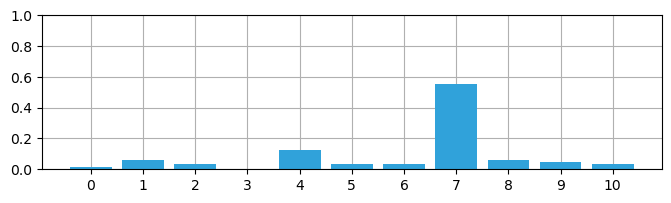

In [196]:
import numpy as np
import kf_book.book_plots as book_plots

belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)
print('sum = ', np.sum(belief))

Each position has a probability between 0 and 1, and the sum of all equals one, so this makes it a probability distribution. Each probability is discrete, so we can more precisely call this a discrete probability distribution. In practice we leave out the terms discrete and continuous unless we have a particular reason to make that distinction.

Каждая позиция имеет вероятность от 0 до 1, а сумма всех равна единице, так что это делает ее распределением вероятностей. Каждая вероятность дискретна, так что мы можем точнее назвать это дискретным распределением вероятностей. На практике мы опускаем термины дискретный и непрерывный, если только у нас нет особой причины проводить это различие.

### The Mean, Median, and Mode of a Random Variable

Given a set of data we often want to know a representative or average value for that set. There are many measures for this, and the concept is called a [*measure of central tendency*](https://en.wikipedia.org/wiki/Central_tendency). For example we might want to know the *average* height of the students in a class. We all know how to find the average of a set of data, but let me belabor the point so I can introduce more formal notation and terminology. Another word for average is the *mean*. We compute the mean by summing the values and dividing by the number of values. If the heights of the students in meters is 

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

we compute the mean as

$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

It is traditional to use the symbol $\mu$ (mu) to denote the mean.

We can formalize this computation with the equation

$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$

NumPy provides `numpy.mean()` for computing the mean.

Имея набор данных, мы часто хотим узнать репрезентативное или среднее значение для этого набора. Для этого существует множество мер, и эта концепция называется [*мера центральной тенденции*](https://en.wikipedia.org/wiki/Central_tendency). Например, мы можем захотеть узнать *средний* рост учеников в классе. Мы все знаем, как найти среднее значение набора данных, но позвольте мне подробно остановиться на этом, чтобы я мог ввести более формальные обозначения и терминологию. Другое слово для среднего — *среднее*. Мы вычисляем среднее, суммируя значения и деля на количество значений. Если рост учащихся в метрах равен

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

мы вычисляем среднее значение как

$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

Традиционно для обозначения среднего значения используется символ $\mu$ (mu).

Мы можем формализовать это вычисление с помощью уравнения

$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$

NumPy предоставляет `numpy.mean()` для вычисления среднего значения.

In [197]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)

1.8

As a convenience NumPy arrays provide the method `mean()`.

Для удобства массивы NumPy предоставляют метод `mean()`.

In [198]:
x = np.array([1.8, 2.0, 1.7, 1.9, 1.6])
x.mean()

1.8

The *mode* of a set of numbers is the number that occurs most often. If only one number occurs most often we say it is a *unimodal* set, and if two or more numbers occur the most with equal frequency than the set is *multimodal*. For example the set {1, 2, 2, 2, 3, 4, 4, 4} has modes 2 and 4, which is multimodal, and the set {5, 7, 7, 13} has the mode 7, and so it is unimodal. We will not be computing the mode in this manner in this book, but we do use the concepts of unimodal and multimodal in a more general sense. For example, in the **Discrete Bayes** chapter we talked about our belief in the dog's position as a *multimodal distribution* because we assigned different probabilities to different positions.

Finally, the *median* of a set of numbers is the middle point of the set so that half the values are below the median and half are above the median. Here, above and below is in relation to the set being sorted.  If the set contains an even number of values then the two middle numbers are averaged together.

Numpy provides `numpy.median()` to compute the median. As you can see the median of {1.8, 2.0, 1.7, 1.9, 1.6} is 1.8, because 1.8 is the third element of this set after being sorted. In this case the median equals the mean, but that is not generally true.

*Мода* набора чисел — это число, которое встречается чаще всего. Если чаще всего встречается только одно число, мы говорим, что это *унимодальный* набор, а если два или более чисел встречаются чаще всего с одинаковой частотой, то набор является *мультимодальным*. Например, набор {1, 2, 2, 2, 3, 4, 4, 4} имеет моды 2 и 4, что является многомодальным, а набор {5, 7, 7, 13} имеет моду 7, и поэтому он унимодальный. Мы не будем вычислять моду таким образом в этой книге, но мы используем концепции унимодальности и мультимодальности в более общем смысле. Например, в главе **Дискретный Байес** мы говорили о нашей вере в положение собаки как *мультимодальное распределение*, потому что мы назначили разные вероятности разным положениям. Наконец, *медиана* набора чисел — это средняя точка набора, так что половина значений находится ниже медианы, а половина — выше медианы. Здесь выше и ниже — по отношению к сортируемому набору. Если набор содержит четное количество значений, то два средних числа усредняются вместе.

Numpy предоставляет `numpy.median()` для вычисления медианы. Как вы можете видеть, медиана {1.8, 2.0, 1.7, 1.9, 1.6} равна 1.8, потому что 1.8 — третий элемент этого набора после сортировки. В этом случае медиана равна среднему значению, но это не всегда так.

In [199]:
np.median(x)

1.8

## Expected Value of a Random Variable

The [*expected value*](https://en.wikipedia.org/wiki/Expected_value) of a random variable is the average value it would have if we took an infinite number of samples of it and then averaged those samples together. Let's say we have $x=[1,3,5]$ and each value is equally probable. What value would we *expect* $x$ to have, on average?

It would be the average of 1, 3, and 5, of course, which is 3. That should make sense; we would expect equal numbers of 1, 3, and 5 to occur, so $(1+3+5)/3=3$ is clearly the average of that infinite series of samples. In other words, here the expected value is the *mean* of the sample space.

Now suppose that each value has a different probability of happening. Say 1 has an 80% chance of occurring, 3 has an 15% chance, and 5 has only a 5% chance. In this case we compute the expected value by multiplying each value of $x$ by the percent chance of it occurring, and summing the result. For this case we could compute

$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$

Here I have introduced the notation $\mathbb E[X]$ for the expected value of $x$. Some texts use $E(x)$. The value 1.5 for $x$ makes intuitive sense because $x$ is far more likely to be 1 than 3 or 5, and 3 is more likely than 5 as well.

We can formalize this by letting $x_i$ be the $i^{th}$ value of $X$, and $p_i$ be the probability of its occurrence. This gives us

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

A trivial bit of algebra shows that if the probabilities are all equal, the expected value is the same as the mean:

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

If $x$ is continuous we substitute the sum for an integral, like so

$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

where $f(x)$ is the probability distribution function of $x$. We won't be using this equation yet, but we will be using it in the next chapter.

We can write a bit of Python to simulate this. Here I take 1,000,000 samples and compute the expected value of the distribution we just computed analytically.

## Ожидаемое значение случайной величины

[*Ожидаемое значение*](https://en.wikipedia.org/wiki/Ожидаемое_значение) случайной величины — это среднее значение, которое она имела бы, если бы мы взяли бесконечное число ее образцов и затем усреднили эти образцы вместе. Допустим, у нас есть $x=[1,3,5]$, и каждое значение равновероятно. Какое значение мы *ожидаем* от $x$ в среднем?

Конечно, это будет среднее значение 1, 3 и 5, то есть 3. Это должно иметь смысл; мы ожидаем, что будет равное количество 1, 3 и 5, поэтому $(1+3+5)/3=3$ — это, очевидно, среднее значение этой бесконечной серии образцов. Другими словами, здесь ожидаемое значение — это *среднее* выборочного пространства.

Теперь предположим, что каждое значение имеет различную вероятность появления. Допустим, вероятность появления 1 составляет 80%, вероятность появления 3 — 15%, а вероятность появления 5 — всего 5%. В этом случае мы вычисляем ожидаемое значение, умножая каждое значение $x$ на процентную вероятность его появления и суммируя результаты. Для этого случая мы могли бы вычислить

$$\mathbb E[X] = (1)(0,8) + (3)(0,15) + (5)(0,05) = 1,5$$

Здесь я ввел обозначение $\mathbb E[X]$ для ожидаемого значения $x$. В некоторых текстах используется $E(x)$. Значение 1,5 для $x$ интуитивно понятно, поскольку $x$ гораздо более вероятно, что будет 1, чем 3 или 5, а 3 также более вероятно, чем 5.

Мы можем формализовать это, позволив $x_i$ быть $i^{th}$ значением $X$, а $p_i$ — вероятностью его появления. Это дает нам

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

Тривиальный кусочек алгебры показывает, что если вероятности все равны, ожидаемое значение совпадает со средним:

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

Если $x$ непрерывен, мы заменяем сумму на интеграл, например, так

$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

где $f(x)$ — это функция распределения вероятностей $x$. Мы пока не будем использовать это уравнение, но воспользуемся им в следующей главе.

Мы можем написать немного кода на Python, чтобы смоделировать это. Здесь я беру 1 000 000 выборок и вычисляю ожидаемое значение распределения, которое мы только что вычислили аналитически.

In [200]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r <= .80: total += 1
    elif r < .95: total += 3
    else: total += 5

total / N

1.499842

You can see that the computed value is close to the analytically derived value. It is not exact because getting an exact values requires an infinite sample size.

Вы можете видеть, что вычисленное значение близко к аналитически полученному значению. Оно не точное, поскольку для получения точного значения требуется бесконечный размер выборки.

### Exercise

What is the expected value of a die roll?

Каково ожидаемое значение броска игральной кости?

### Solution

Each side is equally likely, so each has a probability of 1/6. Hence

Каждая сторона одинаково вероятна, поэтому каждая имеет вероятность 1/6. Следовательно

$$\begin{aligned}
\mathbb E[X] &= 1/6\times1 + 1/6\times 2 + 1/6\times 3 + 1/6\times 4 + 1/6\times 5 + 1/6\times6 \\
&= 1/6(1+2+3+4+5+6)\\&= 3.5\end{aligned}$$

### Exercise

Given the uniform continuous distribution

Учитывая равномерное непрерывное распределение

$$f(x) = \frac{1}{b - a}$$

compute the expected value for $a=0$ and $b=20$.

вычислите ожидаемое значение для $a=0$ и $b=20$.

### Solution
$$\begin{aligned}
\mathbb E[X] &= \int_0^{20}\, x\frac{1}{20} \,dx \\
&= \bigg[\frac{x^2}{40}\bigg]_0^{20} \\
&= 10 - 0 \\
&= 10
\end{aligned}$$


### Variance of a Random Variable

The computation above tells us the average height of the students, but it doesn't tell us everything we might want to know. For example, suppose we have three classes of students, which we label $X$, $Y$, and $Z$, with these heights:

Вычисление выше сообщает нам средний рост студентов, но оно не сообщает нам всего, что мы хотели бы знать. Например, предположим, что у нас есть три класса студентов, которые мы обозначим как $X$, $Y$ и $Z$, с такими высотами:

In [201]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

Using NumPy we see that the mean height of each class is the same. 

Используя NumPy, мы видим, что средняя высота каждого класса одинакова.

In [202]:
print(np.mean(X), np.mean(Y), np.mean(Z))

1.8 1.8 1.8


The mean of each class is 1.8 meters, but notice that there is a much greater amount of variation in the heights in the second class than in the first class, and that there is no variation at all in the third class.

The mean tells us something about the data, but not the whole story. We want to be able to specify how much *variation* there is between the heights of the students. You can imagine a number of reasons for this. Perhaps a school district needs to order 5,000 desks, and they want to be sure they buy sizes that accommodate the range of heights of the students. 

Statistics has formalized this concept of measuring variation into the notion of [*standard deviation*](https://en.wikipedia.org/wiki/Standard_deviation) and [*variance*](https://en.wikipedia.org/wiki/Variance). The equation for computing the variance is

Среднее значение для каждого класса составляет 1,8 метра, но обратите внимание, что во втором классе наблюдается гораздо большее отклонение в росте, чем в первом, а в третьем классе вообще нет никаких отклонений.

Среднее значение говорит нам кое-что о данных, но не всю историю. Мы хотим иметь возможность указать, насколько велик *отклонения* между ростом учеников. Вы можете представить себе ряд причин для этого. Возможно, школьному округу необходимо заказать 5000 парт, и они хотят быть уверены, что покупают размеры, которые соответствуют диапазону роста учеников.

Статистика формализовала эту концепцию измерения отклонения в понятиях [*стандартного отклонения*](https://en.wikipedia.org/wiki/Standard_deviation) и [*дисперсии*](https://en.wikipedia.org/wiki/Дисперсии). Уравнение для вычисления дисперсии следующее:

$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

Ignoring the square for a moment, you can see that the variance is the *expected value* for how much the sample space $X$ varies from the mean $\mu:$ ($X-\mu)$. I will explain the purpose of the squared term later. The formula for the expected value is $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$ so we can substitute that into the equation above to get

Проигнорировав на мгновение квадрат, вы можете увидеть, что дисперсия - это *ожидаемое значение* того, насколько выборочное пространство $X$ отличается от среднего $\mu:$ ($X-\mu)$. Я объясню назначение квадратного члена позже. Формула для ожидаемого значения - $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$, поэтому мы можем подставить это в уравнение выше, чтобы получить

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$
 
Let's compute the variance of the three classes to see what values we get and to become familiar with this concept.

The mean of $X$ is 1.8 ($\mu_x = 1.8$) so we compute

Давайте вычислим дисперсию трех классов, чтобы увидеть, какие значения мы получим, и познакомиться с этой концепцией.

Среднее значение $X$ равно 1,8 ($\mu_x = 1,8$), поэтому мы вычисляем

$$ 
\begin{aligned}
\mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(X)&= 0.02 \, m^2
\end{aligned}$$

NumPy provides the function `var()` to compute the variance:

NumPy предоставляет функцию `var()` для вычисления дисперсии:

In [203]:
print(f"{np.var(X):.2f} meters squared")

0.02 meters squared


This is perhaps a bit hard to interpret. Heights are in meters, yet the variance is meters squared. Thus we have a more commonly used measure, the *standard deviation*, which is defined as the square root of the variance:

Это, возможно, немного сложно интерпретировать. Рост указан в метрах, но дисперсия — это квадрат метров. Таким образом, у нас есть более часто используемая мера, *стандартное отклонение*, которое определяется как квадратный корень дисперсии:

$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

It is typical to use $\sigma$ for the *standard deviation* and $\sigma^2$ for the *variance*. In most of this book I will be using $\sigma^2$ instead of $\mathit{VAR}(X)$ for the variance; they symbolize the same thing.

For the first class we compute the standard deviation with

Обычно используют $\sigma$ для *стандартного отклонения* и $\sigma^2$ для *дисперсии*. В большей части этой книги я буду использовать $\sigma^2$ вместо $\mathit{VAR}(X)$ для дисперсии; они символизируют одно и то же.

Для первого класса мы вычисляем стандартное отклонение с помощью

$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

We can verify this computation with the NumPy method `numpy.std()` which computes the standard deviation. 'std' is a common abbreviation for standard deviation.

Мы можем проверить это вычисление с помощью метода NumPy `numpy.std()`, который вычисляет стандартное отклонение. «std» — это общепринятое сокращение для стандартного отклонения.

In [204]:
print(f"std {np.std(X):.4f}")
print(f"var {np.std(X)**2:.4f}")

std 0.1414
var 0.0200


And, of course, $0.1414^2 = 0.02$, which agrees with our earlier computation of the variance.

What does the standard deviation signify? It tells us how much the heights vary amongst themselves. "How much" is not a mathematical term. We will be able to define it much more precisely once we introduce the concept of a Gaussian in the next section. For now I'll say that for many things 68% of all values lie within one standard deviation of the mean. In other words we can conclude that for a random class 68% of the students will have heights between 1.66 (1.8-0.1414) meters and 1.94 (1.8+0.1414) meters. 

We can view this in a plot:

И, конечно, $0,1414^2 = 0,02$, что согласуется с нашим предыдущим вычислением дисперсии.

Что означает стандартное отклонение? Оно говорит нам, насколько сильно различаются высоты между собой. «Насколько» — это не математический термин. Мы сможем определить его гораздо точнее, как только введем понятие гауссианы в следующем разделе. Сейчас я скажу, что для многих вещей 68% всех значений лежат в пределах одного стандартного отклонения от среднего. Другими словами, мы можем заключить, что для случайного класса 68% учеников будут иметь рост от 1,66 (1,8-0,1414) метра до 1,94 (1,8+0,1414) метра.

Мы можем просмотреть это на графике:

/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127: SyntaxWarning: invalid escape sequence '\s'
  ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127: SyntaxWarning: invalid escape sequence '\s'
  ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127: SyntaxWarning: invalid escape sequence '\m'
  ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127: SyntaxWarning: invalid escape sequence '\s'
  ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127

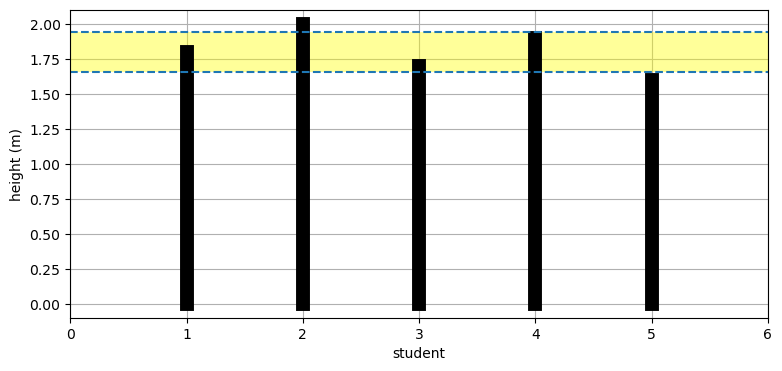

In [205]:
from kf_book.gaussian_internal import plot_height_std
import matplotlib.pyplot as plt

plot_height_std(X)

For only 5 students we obviously will not get exactly 68% within one standard deviation. We do see that 3 out of 5 students are within $\pm1\sigma$, or 60%, which is as close as you can get to 68% with only 5 samples. Let's look at the results for a class with 100 students.

>  We write one standard deviation as  $1\sigma$, which is pronounced "one standard deviation", not "one sigma". Two standard deviations is $2\sigma$, and so on.

Для всего 5 студентов мы, очевидно, не получим точно 68% в пределах одного стандартного отклонения. Мы видим, что 3 из 5 студентов находятся в пределах $\pm1\sigma$, или 60%, что максимально близко к 68% всего с 5 выборками. Давайте посмотрим на результаты для класса из 100 студентов.

> Мы записываем одно стандартное отклонение как $1\sigma$, что произносится как «одно стандартное отклонение», а не «одна сигма». Два стандартных отклонения — это $2\sigma$, и так далее.

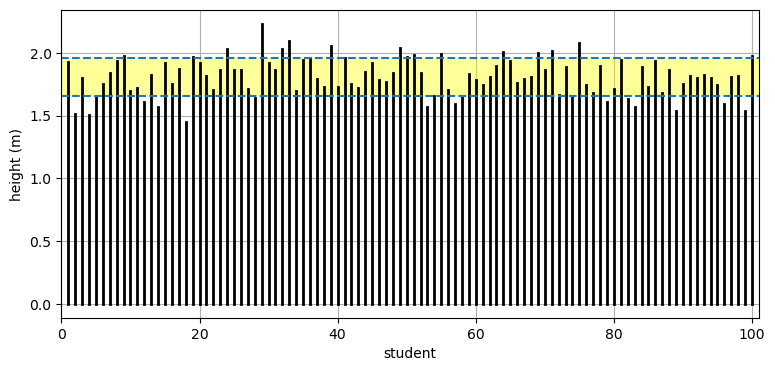

mean = 1.808
std  = 0.149


In [206]:
from numpy.random import randn
data = 1.8 + randn(100)*.1414
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')

By eye roughly 68% of the heights lie within $\pm1\sigma$ of the mean 1.8, but we can verify this with code.

На глаз примерно 68% высот лежат в пределах $\pm1\sigma$ от среднего значения 1,8, но мы можем проверить это с помощью кода.

In [207]:
np.sum((data > mean-std) & (data < mean+std)) / len(data) * 100.

64.0

We'll discuss this in greater depth soon. For now let's compute the standard deviation for 

Мы обсудим это более подробно в ближайшее время. А пока давайте вычислим стандартное отклонение для

$$Y = [2.2, 1.5, 2.3, 1.7, 1.3]$$

The mean of $Y$ is $\mu=1.8$ m, so 

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ m
\end{aligned}$$

We will verify that with NumPy with

Мы проверим это с помощью NumPy с

In [208]:
print(f'std of Y is {np.std(Y):.2f} m')

std of Y is 0.39 m


This corresponds with what we would expect. There is more variation in the heights for $Y$, and the standard deviation is larger.

Finally, let's compute the standard deviation for $Z$. There is no variation in the values, so we would expect the standard deviation to be zero.

Это соответствует тому, что мы ожидали. Для $Y$ больше вариаций высот, и стандартное отклонение больше.

Наконец, давайте вычислим стандартное отклонение для $Z$. Вариаций значений нет, поэтому мы ожидаем, что стандартное отклонение будет равно нулю.

$$ 
\begin{aligned}
\sigma_z &=\sqrt{\frac{(1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2} {5}} \\
&= \sqrt{\frac{0+0+0+0+0}{5}} \\
\sigma_z&= 0.0 \ m
\end{aligned}$$

In [209]:
print(np.std(Z))

0.0


Before we continue I need to point out that I'm ignoring that on average  men are taller than women. In general the height variance of a class that contains only men or women will be smaller than a class with both sexes. This is true for other factors as well. Well nourished children are taller than malnourished children. Scandinavians are taller than Italians. When designing experiments statisticians need to take these factors into account. 

I suggested we might be performing this analysis to order desks for a school district.  For each age group there are likely to be two different means - one clustered around the mean height of the females, and a second mean clustered around the mean heights of the males. The mean of the entire class will be somewhere between the two. If we bought desks for the mean of all students we are likely to end up with desks that fit neither the males or females in the school! 

We will not to consider these issues in this book.  Consult any standard probability text if you need to learn techniques to deal with these issues.

Прежде чем продолжить, я должен отметить, что я игнорирую тот факт, что в среднем мужчины выше женщин. В целом дисперсия роста класса, в котором есть только мужчины или женщины, будет меньше, чем в классе, где есть только мужчины и женщины. Это справедливо и для других факторов. Дети с хорошим питанием выше детей с плохим питанием. Скандинавы выше итальянцев. При планировании экспериментов статистики должны учитывать эти факторы.

Я предположил, что мы можем провести этот анализ, чтобы заказать парты для школьного округа. Для каждой возрастной группы, скорее всего, будет два разных средних значения: одно, сгруппированное вокруг среднего роста женщин, и второе, сгруппированное вокруг среднего роста мужчин. Среднее значение для всего класса будет где-то между ними. Если мы купим парты для среднего значения всех учеников, то, скорее всего, получим парты, которые не подойдут ни мужчинам, ни женщинам в школе!

Мы не будем рассматривать эти вопросы в этой книге. Обратитесь к любому стандартному тексту по вероятности, если вам нужно узнать методы решения этих вопросов.

### Why the Square of the Differences

Why are we taking the *square* of the differences for the variance? I could go into a lot of math, but let's look at this in a simple way. Here is a chart of the values of $X$ plotted against the mean for $X=[3,-3,3,-3]$

Почему мы берем *квадрат* разностей для дисперсии? Я мог бы вдаваться в математику, но давайте посмотрим на это простым способом. Вот график значений $X$, построенных против среднего для $X=[3,-3,3,-3]$

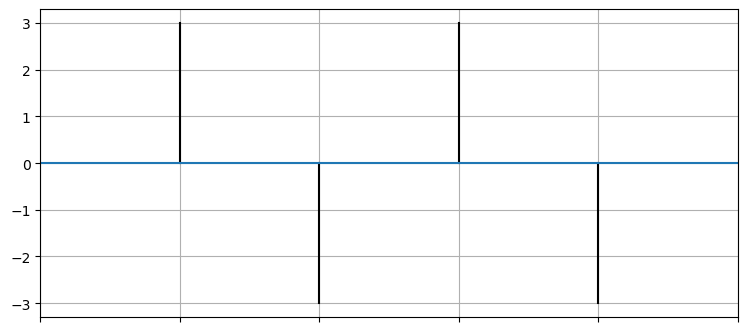

In [210]:
X = [3, -3, 3, -3]
mean = np.average(X)
for i in range(len(X)):
    plt.plot([i ,i], [mean, X[i]], color='k')
plt.axhline(mean)
plt.xlim(-1, len(X))
plt.tick_params(axis='x', labelbottom=False)

If we didn't take the square of the differences the signs would cancel everything out:

Если бы мы не возводили разности в квадрат, знаки бы все сократи ли:

$$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{4} = 0$$

This is clearly incorrect, as there is more than 0 variance in the data. 

Maybe we can use the absolute value? We can see by inspection that the result is $12/4=3$ which is certainly correct — each value varies by 3 from the mean. But what if we have $Y=[6, -2, -3, 1]$? In this case we get $12/4=3$. $Y$ is clearly more spread out than $X$, but the computation yields the same variance. If we use the formula using squares we get a variance of 3.5 for $Y$, which reflects its larger variation.

This is not a proof of correctness. Indeed, Carl Friedrich Gauss, the inventor of the technique, recognized that it is somewhat arbitrary. If there are outliers then squaring the difference gives disproportionate weight to that term. For example, let's see what happens if we have:

Это явно неверно, так как дисперсия в данных больше 0.

Может быть, мы можем использовать абсолютное значение? Мы можем увидеть при осмотре, что результат $12/4=3$, что, безусловно, верно — каждое значение отличается на 3 от среднего. Но что, если у нас $Y=[6, -2, -3, 1]$? В этом случае мы получаем $12/4=3$. $Y$ явно более разбросан, чем $X$, но вычисление дает ту же дисперсию. Если мы используем формулу с использованием квадратов, мы получаем дисперсию 3,5 для $Y$, что отражает ее большую вариацию.

Это не доказательство правильности. Действительно, Карл Фридрих Гаусс, изобретатель метода, признавал, что он несколько произволен. Если есть выбросы, то возведение разницы в квадрат дает непропорциональный вес этому члену. Например, давайте посмотрим, что произойдет, если у нас есть:

In [211]:
X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print(f'Variance of X with outlier    = {np.var(X):6.2f}')
print(f'Variance of X without outlier = {np.var(X[:-1]):6.2f}')

Variance of X with outlier    = 621.45
Variance of X without outlier =   2.03


Is this "correct"? You tell me. Without the outlier of 100 we get $\sigma^2=2.03$, which accurately reflects how $X$ is varying absent the outlier. The one outlier swamps the variance computation. Do we want to swamp the computation so we know there is an outlier, or robustly incorporate the outlier and still provide an estimate close to the value absent the outlier? Again, you tell me. Obviously it depends on your problem.

I will not continue down this path; if you are interested you might want to look at the work that James Berger has done on this problem, in a field called *Bayesian robustness*, or the excellent publications on *robust statistics* by Peter J. Huber [4]. In this book we will always use variance and standard deviation as defined by Gauss.

The point to gather from this is that these *summary* statistics always tell an incomplete story about our data. In this example variance as defined by Gauss does not tell us we have a single large outlier. However, it is a powerful tool, as we can concisely describe a large data set with a few numbers. If we had 1 billion data points we would not want to inspect plots by eye or look at lists of numbers; summary statistics give us a way to describe the shape of the data in a useful way.

Это «правильно»? Скажите мне вы. Без выброса 100 мы получаем $\sigma^2=2.03$, что точно отражает, как $X$ изменяется в отсутствие выброса. Один выброс забивает вычисление дисперсии. Хотим ли мы забить вычисление, чтобы знать, что есть выброс, или надежно включить выброс и все равно предоставить оценку, близкую к значению в отсутствие выброса? Опять же, скажите мне вы. Очевидно, это зависит от вашей проблемы.

Я не буду продолжать в том же духе; если вам интересно, вы можете взглянуть на работу, которую Джеймс Бергер проделал по этой проблеме в области, называемой *Байесовская устойчивость*, или на прекрасные публикации по *надежной статистике* Питера Дж. Хубера [4]. В этой книге мы всегда будем использовать дисперсию и стандартное отклонение, как это определено Гауссом.

Из этого следует, что эти *сводные* статистики всегда рассказывают неполную историю о наших данных. В этом примере дисперсия, как ее определяет Гаусс, не говорит нам, что у нас есть один большой выброс. Однако это мощный инструмент, поскольку мы можем кратко описать большой набор данных с помощью нескольких чисел. Если бы у нас был 1 миллиард точек данных, мы бы не хотели проверять графики на глаз или просматривать списки чисел; сводные статистики дают нам способ описать форму данных полезным способом.

## Gaussians

We are now ready to learn about [Gaussians](https://en.wikipedia.org/wiki/Gaussian_function). Let's remind ourselves of the motivation for this chapter.

> We desire a unimodal, continuous way to represent probabilities that models how the real world works, and that is computationally efficient to calculate.

Let's look at a graph of a Gaussian distribution to get a sense of what we are talking about.

Теперь мы готовы узнать о [гауссовских функциях](https://en.wikipedia.org/wiki/Gaussian_function). Давайте вспомним мотивацию этой главы.

> Мы хотим иметь унимодальный, непрерывный способ представления вероятностей, который моделирует, как работает реальный мир, и который является вычислительно эффективным для расчета.

Давайте посмотрим на график гауссова распределения, чтобы понять, о чем мы говорим.

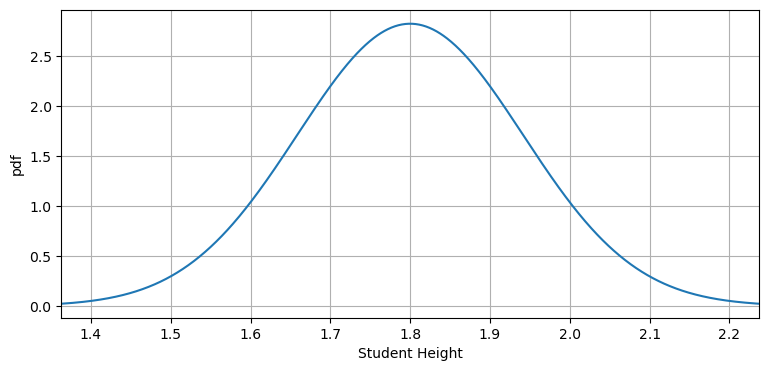

In [212]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, 
                  xlabel='Student Height', ylabel='pdf');

This curve is a [*probability density function*](https://en.wikipedia.org/wiki/Probability_density_function) or *pdf* for short. It shows the relative likelihood  for the random variable to take on a value. We can tell from the chart student is somewhat more likely to have a height near 1.8 m than 1.7 m, and far more likely to have a height of 1.9 m vs 1.4 m. Put another way, many students will have a height near 1.8 m, and very few students will have a height of 1.4 m or 2.2 meters. Finally, notice that the curve is centered over the mean of 1.8 m.

> I explain how to plot Gaussians, and much more, in the Notebook *Computing_and_Plotting_PDFs* in the 
Supporting_Notebooks folder. You can read it online [here](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb) [1].

This may be recognizable to you as a 'bell curve'. This curve is ubiquitous because under real world conditions many observations are distributed in such a manner. I will not use the term 'bell curve' to refer to a Gaussian because many probability distributions have a similar bell curve shape. Non-mathematical sources might not be as precise, so be judicious in what you conclude when you see the term used without definition.

This curve is not unique to heights — a vast amount of natural phenomena exhibits this sort of distribution, including the sensors that we use in filtering problems. As we will see, it also has all the attributes that we are looking for — it represents a unimodal belief or value as a probability, it is continuous, and it is computationally efficient. We will soon discover that it also has other desirable qualities which we may not realize we desire.

To further motivate you, recall the shapes of the probability distributions in the *Discrete Bayes* chapter:

Эта кривая является [*функцией плотности вероятности*](https://en.wikipedia.org/wiki/Probability_density_function) или *pdf* для краткости. Она показывает относительную вероятность того, что случайная величина примет значение. Из графика мы можем сказать, что у студента несколько больше шансов иметь рост около 1,8 м, чем 1,7 м, и гораздо больше шансов иметь рост 1,9 м по сравнению с 1,4 м. Другими словами, у многих студентов будет рост около 1,8 м, и очень немногие студенты будут иметь рост 1,4 м или 2,2 метра. Наконец, обратите внимание, что кривая центрирована над средним значением 1,8 м.

> Я объясняю, как строить графики гауссианов и многое другое, в блокноте *Computing_and_Plotting_PDFs* в папке
Supporting_Notebooks. Вы можете прочитать его онлайн [здесь](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb) [1].

Это может быть вам знакомо как «колоколообразная кривая». Эта кривая встречается повсеместно, потому что в условиях реального мира многие наблюдения распределены таким образом. Я не буду использовать термин «колоколообразная кривая» для обозначения гауссова распределения, потому что многие распределения вероятностей имеют похожую форму колоколообразной кривой. Нематематические источники могут быть не такими точными, поэтому будьте благоразумны в своих выводах, когда видите, что термин используется без определения.

Эта кривая не является уникальной для высот — огромное количество природных явлений демонстрирует такое распределение, включая датчики, которые мы используем в задачах фильтрации. Как мы увидим, он также обладает всеми атрибутами, которые мы ищем — он представляет собой унимодальное убеждение или значение как вероятность, он непрерывен и он вычислительно эффективен. Мы скоро обнаружим, что он также обладает другими желаемыми качествами, которые мы можем не осознавать, что желаем.

Чтобы еще больше мотивировать вас, вспомните формы распределений вероятностей в главе *Дискретный Байес*:

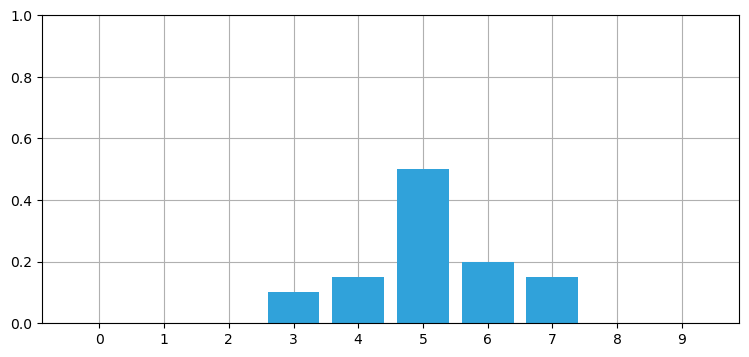

In [213]:
import kf_book.book_plots as book_plots
belief = [0., 0., 0., 0.1, 0.15, 0.5, 0.2, .15, 0, 0]
book_plots.bar_plot(belief)

They were not perfect Gaussian curves, but they were similar. We will be using Gaussians to replace the discrete probabilities used in that chapter!

Они не были идеальными гауссовыми кривыми, но они были похожи. Мы будем использовать гауссовы кривые для замены дискретных вероятностей, использованных в этой главе!

## Nomenclature

A bit of nomenclature before we continue - this chart depicts the *probability density* of a *random variable* having any value between ($-\infty..\infty)$. What does that mean? Imagine we take an infinite number of infinitely precise measurements of the speed of automobiles on a section of highway. We could then plot the results by showing the relative number of cars going past at any given speed. If the average was 120 kph, it might look like this:

Немного терминологии, прежде чем мы продолжим — эта диаграмма отображает *плотность вероятности* *случайной величины*, имеющей любое значение между ($-\infty..\infty)$. Что это значит? Представьте, что мы делаем бесконечное количество бесконечно точных измерений скорости автомобилей на участке шоссе. Затем мы могли бы построить график результатов, показав относительное количество автомобилей, проезжающих с любой заданной скоростью. Если бы средняя скорость была 120 км/ч, это могло бы выглядеть так:

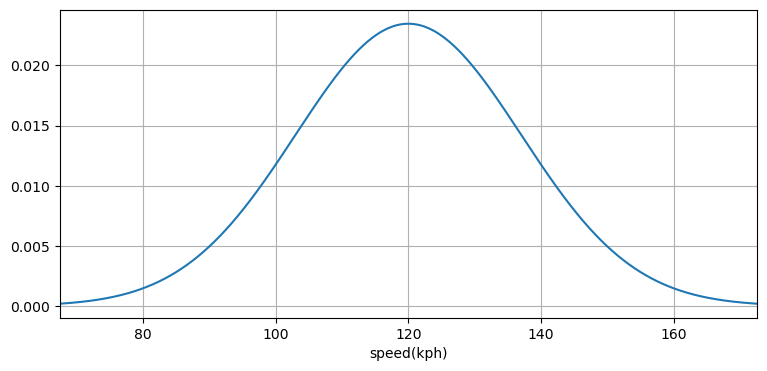

In [214]:
plot_gaussian_pdf(mean=120, variance=17**2, xlabel='speed(kph)');

The y-axis depicts the *probability density* — the relative amount of cars that are going the speed at the corresponding x-axis. I will explain this further in the next section.

The Gaussian model is imperfect. Though these charts do not show it, the *tails* of the distribution extend out to infinity. *Tails* are the far ends of the curve where the values are the lowest. Of course human heights or automobile speeds cannot be less than zero, let alone $-\infty$ or $\infty$. “The map is not the territory” is a common expression, and it is true for Bayesian filtering and statistics. The Gaussian distribution above models the distribution of the measured automobile speeds, but being a model it is necessarily imperfect. The difference between model and reality will come up again and again in these filters. Gaussians are used in many branches of mathematics, not because they perfectly model reality, but because they are easier to use than any other relatively accurate choice. However, even in this book Gaussians will fail to model reality, forcing us to use computationally expensive alternatives. 

You will hear these distributions called *Gaussian distributions* or *normal distributions*.  *Gaussian* and *normal* both mean the same thing in this context, and are used interchangeably. I will use both throughout this book as different sources will use either term, and I want you to be used to seeing both. Finally, as in this paragraph, it is typical to shorten the name and talk about a *Gaussian* or *normal* — these are both typical shortcut names for the *Gaussian distribution*. 

Ось Y отображает *плотность вероятности* — относительное количество автомобилей, которые едут со скоростью на соответствующей оси X. Я объясню это подробнее в следующем разделе.

Гауссовская модель несовершенна. Хотя эти графики этого не показывают, *хвосты* распределения простираются до бесконечности. *Хвосты* — это дальние концы кривой, где значения самые низкие. Конечно, рост человека или скорость автомобиля не могут быть меньше нуля, не говоря уже о $-\infty$ или $\infty$. «Карта — это не территория» — это распространенное выражение, и оно верно для байесовской фильтрации и статистики. Гауссово распределение выше моделирует распределение измеренных скоростей автомобилей, но, будучи моделью, оно обязательно несовершенно. Разница между моделью и реальностью будет возникать снова и снова в этих фильтрах. Гауссовы используются во многих разделах математики не потому, что они идеально моделируют реальность, а потому, что их проще использовать, чем любой другой относительно точный выбор. Однако даже в этой книге гауссовские распределения не смогут смоделировать реальность, заставляя нас использовать вычислительно затратные альтернативы.

Вы услышите, как эти распределения называются *гауссовыми распределениями* или *нормальными распределениями*. *Гауссовское* и *нормальное* оба означают одно и то же в этом контексте и используются взаимозаменяемо. Я буду использовать оба термина в этой книге, поскольку разные источники будут использовать любой из них, и я хочу, чтобы вы привыкли видеть оба. Наконец, как и в этом абзаце, обычно сокращают название и говорят о *гауссовском* или *нормальном* — это оба типичных сокращенных названия для *гауссова распределения*.

## Gaussian Distributions

Let's explore how Gaussians work. A Gaussian is a *continuous probability distribution* that is completely described with two parameters, the mean ($\mu$) and the variance ($\sigma^2$). It is defined as:

Давайте рассмотрим, как работают гауссианы. Гауссиана — это *непрерывное распределение вероятностей*, которое полностью описывается двумя параметрами: средним значением ($\mu$) и дисперсией ($\sigma^2$). Она определяется как:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$

$\exp[x]$ is notation for $e^x$.

<p> Don't be dissuaded by the equation if you haven't seen it before; you will not need to memorize or manipulate it. The computation of this function is stored in `stats.py` with the function `gaussian(x, mean, var, normed=True)`. 
    
Shorn of the constants, you can see it is a simple exponential:

<p> Не пугайтесь уравнения, если вы его раньше не видели; вам не нужно его запоминать или манипулировать им. Вычисление этой функции хранится в `stats.py` с функцией `gaussian(x, mean, var, normed=True)`.

Если убрать константы, то можно увидеть, что это простая экспонента:
    
$$f(x)\propto e^{-x^2}$$

which has the familiar bell curve shape

который имеет знакомую форму колоколообразной кривой

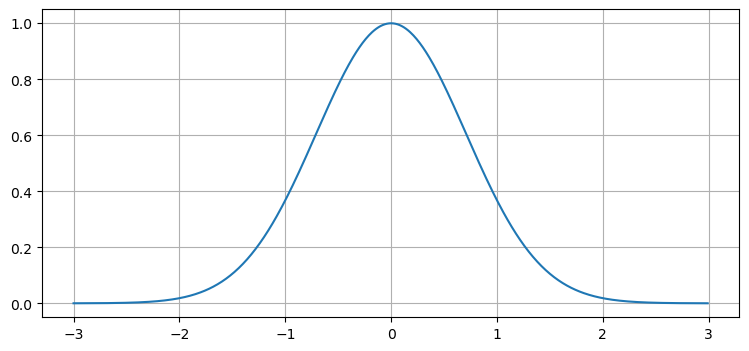

In [215]:
x = np.arange(-3, 3, .01)
plt.plot(x, np.exp(-x**2));

Let's remind ourselves how to look at the code for a function. In a cell, type the function name followed by two question marks and press CTRL+ENTER. This will open a popup window displaying the source. Uncomment the next cell and try it now.

Давайте вспомним, как смотреть на код функции. В ячейке введите имя функции, затем два вопросительных знака и нажмите CTRL+ENTER. Это откроет всплывающее окно, отображающее исходный код. Раскомментируйте следующую ячейку и попробуйте сейчас.

In [242]:
from filterpy.stats import gaussian
# gaussian??

Let's plot a Gaussian with a mean of 22 $(\mu=22)$, with a variance of 4 $(\sigma^2=4)$. 

Давайте построим гауссиану со средним значением 22 $(\mu=22)$ и дисперсией 4 $(\sigma^2=4)$.

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_1872358/2993046749.py:1: SyntaxWarning: invalid escape sequence '\c'
  plot_gaussian_pdf(22, 4, mean_line=True, xlabel='$^{\circ}C$');


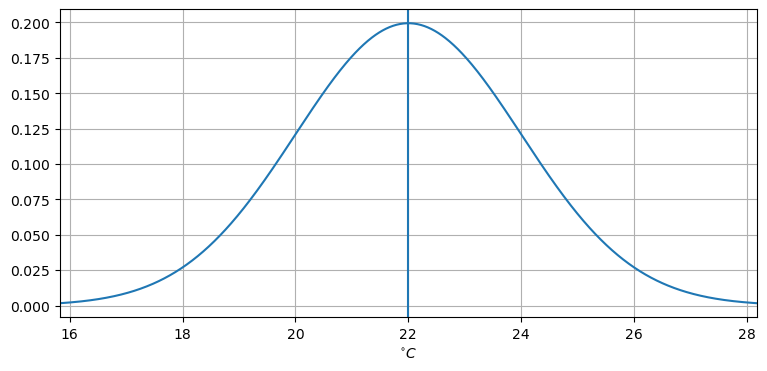

In [217]:
plot_gaussian_pdf(22, 4, mean_line=True, xlabel='$^{\circ}C$');

What does this curve *mean*? Assume we have a thermometer which reads 22°C. No thermometer is perfectly accurate, and so we expect that each reading will be slightly off the actual value. However, a theorem called  [*Central Limit Theorem*](https://en.wikipedia.org/wiki/Central_limit_theorem) states that if we make many measurements that the measurements will be normally distributed. When we look at this chart we can see it is proportional to the probability of the thermometer reading a particular value given the actual temperature of 22°C. 

Recall that a Gaussian distribution is *continuous*. Think of an infinitely long straight line - what is the probability that a point you pick randomly is at 2. Clearly 0%, as there is an infinite number of choices to choose from. The same is true for normal distributions; in the graph above the probability of being *exactly* 2°C is 0% because there are an infinite number of values the reading can take.

What is this curve? It is something we call the *probability density function.* The area under the curve at any region gives you the probability of those values. So, for example, if you compute the area under the curve between 20 and 22 the resulting area will be the probability of the temperature reading being between those two temperatures. 

Here is another way to understand it. What is the *density* of a rock, or a sponge? It is a measure of how much mass is compacted into a given space. Rocks are dense, sponges less so. So, if you wanted to know how much a rock weighed but didn't have a scale, you could take its volume and multiply by its density. This would give you its mass. In practice density varies in most objects, so you would integrate the local density across the rock's volume.

Что означает эта кривая? Предположим, у нас есть термометр, который показывает 22°C. Ни один термометр не является абсолютно точным, поэтому мы ожидаем, что каждое показание будет немного отличаться от фактического значения. Однако теорема, называемая [*Центральная предельная теорема*](https://en.wikipedia.org/wiki/Central_limit_theorem), гласит, что если мы сделаем много измерений, то результаты будут распределены нормально. Когда мы посмотрим на эту диаграмму, мы увидим, что она пропорциональна вероятности того, что термометр покажет определенное значение при фактической температуре 22°C.

Вспомним, что распределение Гаусса является *непрерывным*. Представьте себе бесконечно длинную прямую линию — какова вероятность того, что точка, которую вы выбираете случайно, будет на 2. Очевидно, 0%, так как есть бесконечное количество вариантов выбора. То же самое верно и для нормальных распределений; на графике выше вероятность того, что будет *ровно* 2°C, равна 0%, так как есть бесконечное количество значений, которые может принимать показание.

Что это за кривая? Это то, что мы называем *функцией плотности вероятности*. Площадь под кривой в любой области дает вам вероятность этих значений. Так, например, если вы вычислите площадь под кривой между 20 и 22, то полученная площадь будет вероятностью показания температуры между этими двумя температурами.

Вот еще один способ понять это. Какова *плотность* камня или губки? Это мера того, сколько массы уплотнено в данном пространстве. Камни плотные, губки — меньше. Так что, если вы хотите узнать, сколько весит камень, но у вас нет весов, вы можете взять его объем и умножить на его плотность. Это даст вам его массу. На практике плотность различается у большинства объектов, поэтому вы должны интегрировать локальную плотность по всему объему камня.

$$M = \iiint_R p(x,y,z)\, dV$$

We do the same with *probability density*. If you want to know the temperature being between 20°C and 21°C you would integrate the curve above from 20 to 21. As you know the integral of a curve gives you the area under the curve. Since this is a curve of the probability density, the integral of the density is the probability. 

What is the probability of the temperature being exactly 22°C? Intuitively, 0. These are real numbers, and the odds of 22°C vs, say, 22.00000000000017°C is infinitesimal. Mathematically, what would we get if we integrate from 22 to 22? Zero. 

Thinking back to the rock, what is the weight of an single point on the rock? An infinitesimal point must have no weight. It makes no sense to ask the weight of a single point, and it makes no sense to ask about the probability of a continuous distribution having a single value. The answer for both is obviously zero.

In practice our sensors do not have infinite precision, so a reading of 22°C implies a range, such as 22 $\pm$ 0.1°C, and we can compute the probability of that range by integrating from 21.9 to 22.1.

We can think of this in Bayesian terms or frequentist terms. As a Bayesian, if the thermometer reads exactly 22°C, then our belief is described by the curve - our belief that the actual (system) temperature is near 22°C is very high, and our belief that the actual temperature is near 18 is very low. As a frequentist we would say that if we took 1 billion temperature measurements of a system at exactly 22°C, then a histogram of the measurements would look like this curve. 

How do you compute the probability, or area under the curve? You integrate the equation for the Gaussian 

То же самое мы делаем с *плотностью вероятности*. Если вы хотите узнать, что температура находится в диапазоне от 20°C до 21°C, вы должны проинтегрировать кривую выше от 20 до 21. Как вы знаете, интеграл кривой дает вам площадь под кривой. Поскольку это кривая плотности вероятности, интеграл плотности является вероятностью.

Какова вероятность того, что температура будет ровно 22°C? Интуитивно понятно, что 0. Это действительные числа, и шансы 22°C против, скажем, 22,000000000000017°C бесконечно малы. Математически, что мы получим, если проинтегрируем от 22 до 22? Ноль.

Возвращаясь к скале, каков вес одной точки на скале? Бесконечно малая точка не должна иметь веса. Бессмысленно спрашивать вес одной точки, и бессмысленно спрашивать о вероятности того, что непрерывное распределение имеет одно значение. Ответ для обоих случаев, очевидно, равен нулю.

На практике наши датчики не обладают бесконечной точностью, поэтому показание 22 °C подразумевает диапазон, например 22 $\pm$ 0,1 °C, и мы можем вычислить вероятность этого диапазона, проинтегрировав от 21,9 до 22,1.

Мы можем думать об этом в байесовских терминах или терминах частотника. Как байесианец, если термометр показывает точно 22 °C, то наша вера описывается кривой — наша вера в то, что фактическая температура (системы) близка к 22 °C, очень высока, а наша вера в то, что фактическая температура близка к 18, очень низка. Как частотник, мы бы сказали, что если бы мы сделали 1 миллиард измерений температуры системы при точно 22 °C, то гистограмма измерений выглядела бы как эта кривая.

Как вычислить вероятность или площадь под кривой? Вы интегрируете уравнение для гауссовой

$$ \int^{x_1}_{x_0}  \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}{(x-\mu)^2}/\sigma^2 } dx$$

This is called the *cumulative probability distribution*, commonly abbreviated *cdf*.
Это называется *кумулятивным распределением вероятностей*, обычно сокращенно *cdf*.

I wrote `filterpy.stats.norm_cdf` which computes the integral for you. For example, we can compute

Я написал `filterpy.stats.norm_cdf`, который вычисляет интеграл для вас. Например, мы можем вычислить

In [218]:
from filterpy.stats import norm_cdf
print('Cumulative probability of range 21.5 to 22.5 is {:.2f}%'.format(
      norm_cdf((21.5, 22.5), 22,4)*100))
print('Cumulative probability of range 23.5 to 24.5 is {:.2f}%'.format(
      norm_cdf((23.5, 24.5), 22,4)*100))

Cumulative probability of range 21.5 to 22.5 is 19.74%
Cumulative probability of range 23.5 to 24.5 is 12.10%


The mean ($\mu$) is what it sounds like — the average of all possible probabilities. Because of the symmetric shape of the curve it is also the tallest part of the curve. The thermometer reads 22°C, so that is what we used for the mean.  

The notation for a normal distribution for a random variable $X$ is $X \sim\ \mathcal{N}(\mu,\sigma^2)$ where $\sim$ means *distributed according to*. This means I can express the temperature reading of our thermometer as

$$\text{temp} \sim \mathcal{N}(22,4)$$

This is an extremely important result. Gaussians allow me to capture an infinite number of possible values with only two numbers! With the values $\mu=22$ and $\sigma^2=4$ I can compute the distribution of measurements over any range.

Some sources use $\mathcal N (\mu, \sigma)$ instead of $\mathcal N (\mu, \sigma^2)$. Either is fine, they are both conventions. You need to keep in mind which form is being used if you see a term such as $\mathcal{N}(22,4)$. In this book I always use $\mathcal N (\mu, \sigma^2)$, so $\sigma=2$, $\sigma^2=4$ for this example.

Среднее значение ($\mu$) — это то, на что оно похоже — среднее значение всех возможных вероятностей. Из-за симметричной формы кривой это также самая высокая часть кривой. Термометр показывает 22°C, поэтому это то, что мы использовали для среднего значения.

Обозначение нормального распределения для случайной величины $X$ — $X \sim\ \mathcal{N}(\mu,\sigma^2)$, где $\sim$ означает *распределено согласно*. Это означает, что я могу выразить показание температуры нашего термометра как

$$\text{temp} \sim \mathcal{N}(22,4)$$

Это чрезвычайно важный результат. Гауссовы функции позволяют мне захватить бесконечное количество возможных значений всего двумя числами! Со значениями $\mu=22$ и $\sigma^2=4$ я могу вычислить распределение измерений в любом диапазоне.

Некоторые источники используют $\mathcal N (\mu, \sigma)$ вместо $\mathcal N (\mu, \sigma^2)$. Любой из вариантов хорош, оба они являются соглашениями. Вам нужно помнить, какая форма используется, если вы видите такой термин, как $\mathcal{N}(22,4)$. В этой книге я всегда использую $\mathcal N (\mu, \sigma^2)$, поэтому $\sigma=2$, $\sigma^2=4$ для этого примера.

## The Variance and Belief

Since this is a probability density distribution it is required that the area under the curve always equals one. This should be intuitively clear — the area under the curve represents all possible outcomes, *something* happened, and the probability of *something happening* is one, so the density must sum to one. We can prove this ourselves with a bit of code. (If you are mathematically inclined, integrate the Gaussian equation from $-\infty$ to $\infty$)

Поскольку это распределение плотности вероятности, требуется, чтобы площадь под кривой всегда равнялась единице. Это должно быть интуитивно понятно — площадь под кривой представляет все возможные результаты, *что-то* произошло, и вероятность *чего-то* случиться равна единице, поэтому плотность должна в сумме равняться единице. Мы можем доказать это сами с помощью небольшого кода. (Если вы склонны к математике, проинтегрируйте уравнение Гаусса от $-\infty$ до $\infty$)

In [219]:
print(norm_cdf((-1e8, 1e8), mu=0, var=4))

1.0


This leads to an important insight. If the variance is small the curve will be narrow. this is because the variance is a measure of *how much* the samples vary from the mean. To keep the area equal to 1, the curve must also be tall. On the other hand if the variance is large the curve will be wide, and thus it will also have to be short to make the area equal to 1.

Let's look at that graphically. We will use the aforementioned `filterpy.stats.gaussian` which can take either a single value or array of values.

Это приводит к важному пониманию. Если дисперсия мала, кривая будет узкой. Это потому, что дисперсия является мерой того, *насколько* выборки отличаются от среднего. Чтобы сохранить площадь равной 1, кривая также должна быть высокой. С другой стороны, если дисперсия велика, кривая будет широкой, и, следовательно, она также должна быть короткой, чтобы сделать площадь равной 1.

Давайте посмотрим на это графически. Мы будем использовать вышеупомянутый `filterpy.stats.gaussian`, который может принимать либо одно значение, либо массив значений.

In [220]:
from filterpy.stats import gaussian

print(gaussian(x=3.0, mean=2.0, var=1))
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1))

0.24197072451914337
[0.378 0.622]


By default `gaussian` normalizes the output, which turns the output back into a probability distribution. Use the argument`normed` to control this.

По умолчанию `gaussian` нормализует вывод, что превращает вывод обратно в распределение вероятностей. Используйте аргумент `normed` для управления этим.

In [221]:
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1, normed=False))

[0.242 0.399]


If the Gaussian is not normalized it is called a *Gaussian function* instead of *Gaussian distribution*.  

Если гауссово распределение не нормализовано, оно называется *гауссовой функцией*, а не *гауссовым распределением*.

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1872358/1503147441.py:2: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
/tmp/ipykernel_1872358/1503147441.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
/tmp/ipykernel_1872358/1503147441.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')


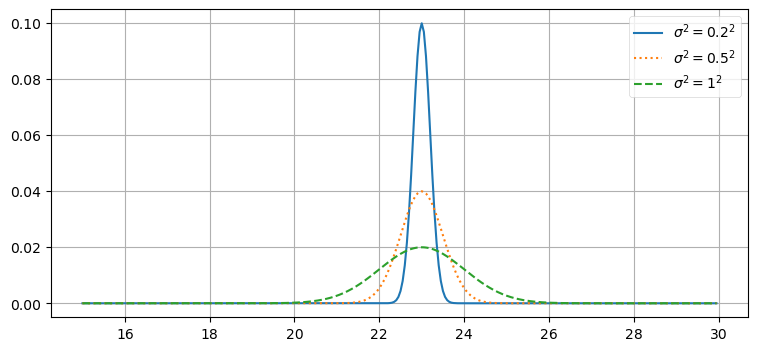

In [222]:
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')
plt.legend();

What is this telling us? The Gaussian with $\sigma^2=0.2^2$ is very narrow. It is saying that we believe $x=23$, and that we are very sure about that: within $\pm 0.2$ std. In contrast, the Gaussian with $\sigma^2=1^2$ also believes that $x=23$, but we are much less sure about that. Our belief that $x=23$ is lower, and so our belief about the likely possible values for $x$ is spread out — we think it is quite likely that $x=20$ or $x=26$, for example. $\sigma^2=0.2^2$ has almost completely eliminated $22$ or $24$ as possible values, whereas $\sigma^2=1^2$ considers them nearly as likely as $23$.

If we think back to the thermometer, we can consider these three curves as representing the readings from three different thermometers. The curve for $\sigma^2=0.2^2$ represents a very accurate thermometer, and curve for $\sigma^2=1^2$ represents a fairly inaccurate one. Note the very powerful property the Gaussian distribution affords us — we can entirely represent both the reading and the error of a thermometer with only two numbers — the mean and the variance.

An equivalent formation for a Gaussian is $\mathcal{N}(\mu,1/\tau)$ where $\mu$ is the *mean* and $\tau$ the *precision*. $1/\tau = \sigma^2$; it is the reciprocal of the variance. While we do not use this formulation in this book, it underscores that the variance is a measure of how precise our data is. A small variance yields large precision — our measurement is very precise. Conversely, a large variance yields low precision — our belief is spread out across a large area. You should become comfortable with thinking about Gaussians in these equivalent forms. In Bayesian terms Gaussians reflect our *belief* about a measurement, they express the *precision* of the measurement, and they express how much *variance* there is in the measurements. These are all different ways of stating the same fact.

I'm getting ahead of myself, but in the next chapters we will use Gaussians to express our belief in things like the estimated position of the object we are tracking, or the accuracy of the sensors we are using.

О чем это нам говорит? Гауссиана с $\sigma^2=0.2^2$ очень узкая. Она говорит, что мы считаем, что $x=23$, и что мы очень уверены в этом: в пределах $\pm 0.2$ std. Напротив, гауссиана с $\sigma^2=1^2$ также считает, что $x=23$, но мы гораздо менее уверены в этом. Наша вера в то, что $x=23$, ниже, и поэтому наша вера в вероятные возможные значения для $x$ разбросана — мы думаем, что вполне вероятно, что $x=20$ или $x=26$, например. $\sigma^2=0.2^2$ почти полностью исключил $22$ или $24$ как возможные значения, тогда как $\sigma^2=1^2$ считает их почти такими же вероятными, как $23$.

Если мы вернемся к термометру, мы можем рассматривать эти три кривые как представляющие показания трех разных термометров. Кривая для $\sigma^2=0.2^2$ представляет собой очень точный термометр, а кривая для $\sigma^2=1^2$ представляет собой довольно неточный. Обратите внимание на очень мощное свойство, которое дает нам распределение Гаусса — мы можем полностью представить как показания, так и ошибку термометра всего двумя числами — средним значением и дисперсией.

Эквивалентная формация для распределения Гаусса — $\mathcal{N}(\mu,1/\tau)$, где $\mu$ — это *среднее значение*, а $\tau$ — *точность*. $1/\tau = \sigma^2$; это обратная величина дисперсии. Хотя мы не используем эту формулировку в этой книге, она подчеркивает, что дисперсия является мерой точности наших данных. Небольшая дисперсия дает большую точность — наше измерение очень точное. И наоборот, большая дисперсия дает низкую точность — наше убеждение разбросано по большой области. Вам должно быть удобно думать о гауссианах в этих эквивалентных формах. В байесовских терминах гауссианы отражают нашу *веру* в измерение, они выражают *точность* измерения и они выражают, насколько велика *дисперсия* в измерениях. Все это разные способы утверждения одного и того же факта.

Я забегаю вперед, но в следующих главах мы будем использовать гауссианы для выражения нашей веры в такие вещи, как предполагаемое положение отслеживаемого нами объекта или точность датчиков, которые мы используем.

## The  68-95-99.7 Rule

It is worth spending a few words on standard deviation now. The standard deviation is a measure of how much the data deviates from the mean. For Gaussian distributions, 68% of all the data falls within one standard deviation ($\pm1\sigma$) of the mean, 95% falls within two standard deviations ($\pm2\sigma$), and 99.7% within three ($\pm3\sigma$). This is often called the [68-95-99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule). If you were told that the average test score in a class was 71 with a standard deviation of 9.4, you could conclude that 95% of the students received a score between 52.2 and 89.8 if the distribution is normal (that is calculated with $71 \pm (2 * 9.4)$). 

Finally, these are not arbitrary numbers. If the Gaussian for our position is $\mu=22$ meters, then the standard deviation also has units meters. Thus $\sigma=0.2$ implies that 68% of the measurements range from 21.8 to 22.2 meters. Variance is the standard deviation squared, thus $\sigma^2 = .04$ meters$^2$. As you saw in the last section, writing $\sigma^2 = 0.2^2$ can make this somewhat more meaningful, since the 0.2 is in the same units as the data.

The following graph depicts the relationship between the standard deviation and the normal distribution. 

Стоит сейчас сказать несколько слов о стандартном отклонении. Стандартное отклонение — это мера того, насколько данные отклоняются от среднего значения. Для гауссовых распределений 68% всех данных попадают в пределы одного стандартного отклонения ($\pm1\sigma$) от среднего значения, 95% попадают в пределы двух стандартных отклонений ($\pm2\sigma$) и 99,7% в пределы трех ($\pm3\sigma$). Это часто называют [правилом 68-95-99,7](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule). Если бы вам сказали, что средний балл за тест в классе составил 71 со стандартным отклонением 9,4, вы могли бы сделать вывод, что 95% учеников получили оценку от 52,2 до 89,8, если распределение нормальное (то есть рассчитывается с помощью $71 \pm (2 * 9,4)$).

Наконец, это не произвольные числа. Если гауссиана для нашей позиции составляет $\mu=22$ метра, то стандартное отклонение также имеет единицы измерения метры. Таким образом, $\sigma=0,2$ означает, что 68% измерений находятся в диапазоне от 21,8 до 22,2 метра. Дисперсия — это квадрат стандартного отклонения, таким образом, $\sigma^2 = .04$ метра$^2$. Как вы видели в последнем разделе, запись $\sigma^2 = 0,2^2$ может сделать это несколько более осмысленным, поскольку 0,2 находится в тех же единицах, что и данные.

Следующий график изображает связь между стандартным отклонением и нормальным распределением.

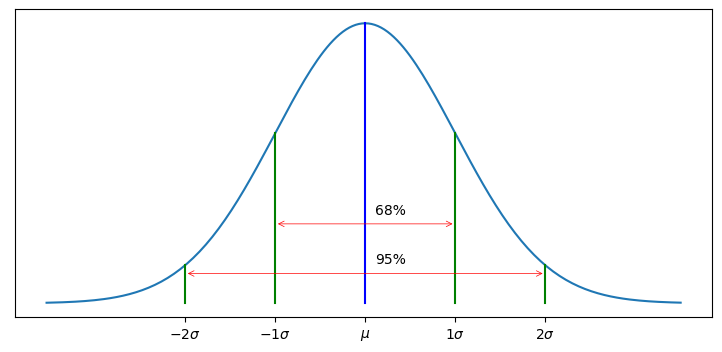

In [223]:
from kf_book.gaussian_internal import display_stddev_plot
display_stddev_plot()

## Interactive Gaussians

For those that are reading this in a Jupyter Notebook, here is an interactive version of the Gaussian plots. Use the sliders to modify $\mu$ and $\sigma^2$. Adjusting $\mu$ will move the graph to the left and right because you are adjusting the mean, and adjusting $\sigma^2$ will make the bell curve thicker and thinner.

Для тех, кто читает это в Jupyter Notebook, вот интерактивная версия гауссовых графиков. Используйте ползунки для изменения $\mu$ и $\sigma^2$. Регулировка $\mu$ сдвинет график влево и вправо, потому что вы корректируете среднее значение, а корректировка $\sigma^2$ сделает кривую распределения тоньше, то толще.

In [224]:
import math
from ipywidgets import interact, FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)
    plt.show()

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

Finally, if you are reading this online, here is an animation of a Gaussian. First, the mean is shifted to the right. Then the mean is centered at $\mu=5$ and the variance is modified.

Наконец, если вы читаете это онлайн, вот анимация гауссианы. Сначала среднее значение смещается вправо. Затем среднее значение центрируется на $\mu=5$, а дисперсия изменяется.

<img src='animations/04_gaussian_animate.gif'>

## Computational Properties of Normally Distributed Random Variables

The discrete Bayes filter works by multiplying and adding arbitrary probability random variables. The Kalman filter uses Gaussians instead of arbitrary random variables, but the rest of the algorithm remains the same. This means we will need to multiply and add Gaussian random variables (Gaussian random variable is just another way to say normally distributed random variable). 

A remarkable property of Gaussian random variables is that the sum of two independent Gaussian random variables is also normally distributed! The product is not Gaussian, but proportional to a Gaussian. There we can say that the result of multipying two Gaussian distributions is a Gaussian function (recall function in this context means that the property that the values sum to one is not guaranteed).

Wikipedia has a good article on this property, and I also prove it at the end of this chapter. 
https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables

Before we do the math, let's test this visually. 

Дискретный фильтр Байеса работает путем умножения и сложения произвольных вероятностных случайных величин. Фильтр Калмана использует гауссовские вместо произвольных случайных величин, но остальная часть алгоритма остается прежней. Это означает, что нам нужно будет умножать и складывать гауссовские случайные величины (гауссовская случайная величина — это просто другой способ сказать нормально распределенная случайная величина).

Замечательным свойством гауссовских случайных величин является то, что сумма двух независимых гауссовских случайных величин также распределена нормально! Произведение не является гауссовым, но пропорционально гауссовскому. Тогда мы можем сказать, что результат умножения двух гауссовых распределений является гауссовой функцией (функция отзыва в этом контексте означает, что свойство, что значения в сумме дают единицу, не гарантируется).

В Википедии есть хорошая статья об этом свойстве, и я также доказываю это в конце этой главы.
https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables

Прежде чем заняться математикой, давайте проверим это визуально.

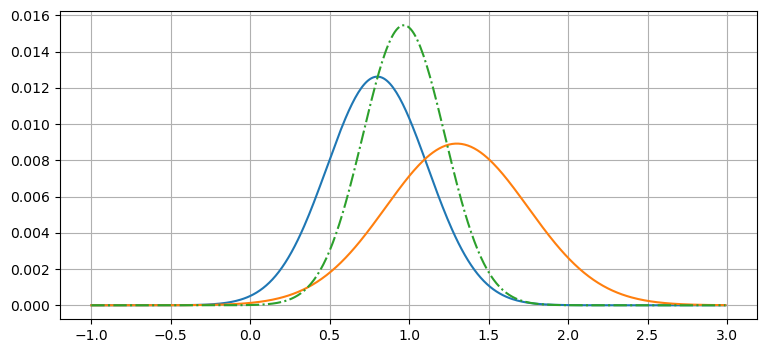

In [225]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean=0.8, var=.1)
g2 = gaussian(x, mean=1.3, var=.2)
plt.plot(x, g1, x, g2)

g = g1 * g2  # element-wise multiplication
g = g / sum(g)  # normalize
plt.plot(x, g, ls='-.');

Here I created two Gaussians, g1=$\mathcal N(0.8, 0.1)$ and g2=$\mathcal N(1.3, 0.2)$ and plotted them. Then I multiplied them together and normalized the result. As you can see the result *looks* like a Gaussian distribution.

Gaussians are nonlinear functions. Typically, if you multiply a nonlinear equations you end up with a different type of function. For example, the shape of multiplying two sins is very different from `sin(x)`.

Здесь я создал два гауссиана, g1=$\mathcal N(0.8, 0.1)$ и g2=$\mathcal N(1.3, 0.2)$ и построил их график. Затем я перемножил их и нормализовал результат. Как вы видите, результат *выглядит* как распределение Гаусса.

Гауссианы — это нелинейные функции. Обычно, если вы перемножаете нелинейные уравнения, вы получаете другой тип функции. Например, форма умножения двух синусов сильно отличается от `sin(x)`.

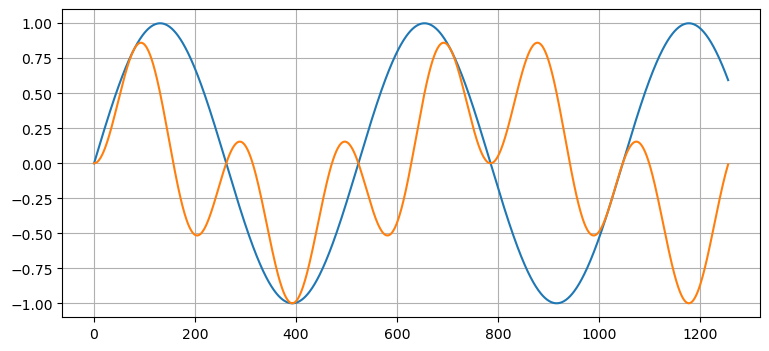

In [226]:
x = np.arange(0, 4*np.pi, 0.01)
plt.plot(np.sin(1.2*x))
plt.plot(np.sin(1.2*x) * np.sin(2*x));

But the result of multiplying two Gaussians distributions is a Gaussian function. This is a key reason why Kalman filters are computationally feasible. Said another way, Kalman filters use Gaussians *because* they are computationally nice. 

The product of two independent Gaussians is given by:

Но результатом умножения двух гауссовских распределений является гауссова функция. Это ключевая причина, по которой фильтры Калмана вычислительно осуществимы. Другими словами, фильтры Калмана используют гауссовы функции, *потому что* они вычислительно хороши.

Произведение двух независимых гауссовских функций определяется как:

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

The sum of two Gaussian random variables is given by

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

At the end of the chapter I derive these equations. However, understanding the deriviation is not very important.

В конце главы я вывожу эти уравнения. Однако понимание вывода не так уж и важно.

## Putting it all Together

Now we are ready to talk about how Gaussians can be used in filtering. In the next chapter we will implement a filter using Gaussins. Here I will explain why we would want to use Gaussians.

In the previous chapter we represented probability distributions with an array. We performed the update computation by computing the element-wise product of that distribution with another distribution representing the likelihood of the measurement at each point, like so:

Теперь мы готовы поговорить о том, как можно использовать гауссианы в фильтрации. В следующей главе мы реализуем фильтр с использованием гауссианов. Здесь я объясню, почему мы хотим использовать гауссианы.

В предыдущей главе мы представляли распределения вероятностей с помощью массива. Мы выполнили вычисление обновления, вычислив поэлементное произведение этого распределения с другим распределением, представляющим вероятность измерения в каждой точке, например:

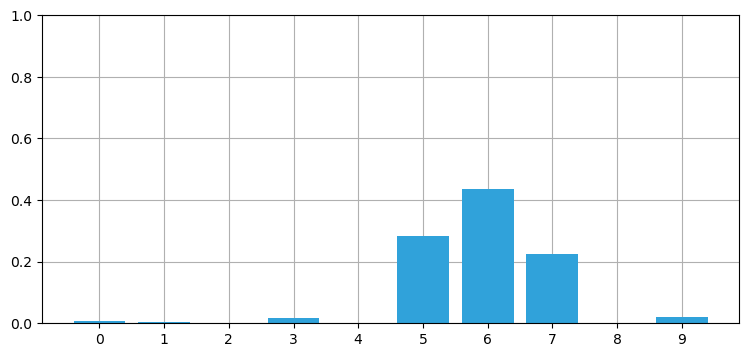

In [227]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
book_plots.bar_plot(posterior)

In other words, we have to compute 10 multiplications to get this result. For a real filter with large arrays in multiple dimensions we'd require billions of multiplications, and vast amounts of memory. 

But this distribution looks like a Gaussian. What if we use a Gaussian instead of an array? I'll compute the mean and variance of the posterior and plot it against the bar chart.

Другими словами, нам нужно вычислить 10 умножений, чтобы получить этот результат. Для настоящего фильтра с большими массивами в нескольких измерениях нам потребуются миллиарды умножений и огромные объемы памяти.

Но это распределение выглядит как гауссово. Что, если мы используем гауссово вместо массива? Я вычислю среднее значение и дисперсию апостериорной функции и нанесу их на столбчатую диаграмму.

mean: 5.88 var: 1.24


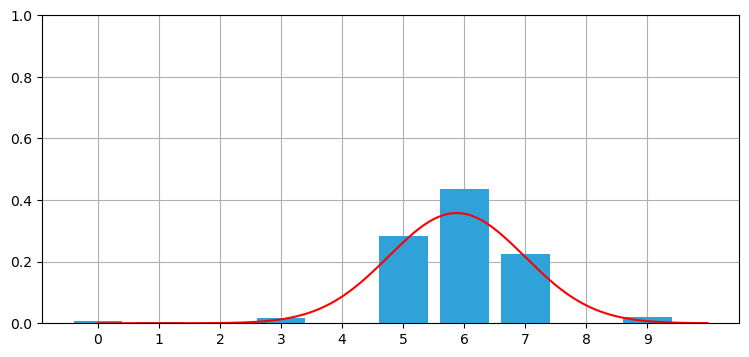

In [228]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)

This is impressive. We can describe an entire distribution of numbers with only two numbers. Perhaps this example is not persuasive, given there are only 10 numbers in the distribution. But a real problem could have millions of numbers, yet still only require two numbers to describe it.

Next, recall that our filter implements the update function with

Это впечатляет. Мы можем описать целое распределение чисел всего двумя числами. Возможно, этот пример не убедителен, учитывая, что в распределении всего 10 чисел. Но реальная проблема может иметь миллионы чисел, но при этом для ее описания все равно потребуется всего два числа.

Далее, вспомним, что наш фильтр реализует функцию обновления с помощью

```python
def update(likelihood, prior):
    return normalize(likelihood * prior)
```

If the arrays contain a million elements, that is one million multiplications. However, if we replace the arrays with a Gaussian then we would perform that calculation with

Если массивы содержат миллион элементов, то это один миллион умножений. Однако, если мы заменим массивы гауссовым, то мы выполним это вычисление с

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

which is three multiplications and two divisions.

что представляет собой три умножения и два деления.

### Bayes Theorem

In the last chapter we developed an algorithm by reasoning about the information we have at each moment, which we expressed as discrete probability distributions. In the process we discovered [*Bayes' Theorem*](https://en.wikipedia.org/wiki/Bayes%27_theorem). Bayes theorem tells us how to compute the probability of an event given prior information. 

We implemented the `update()` function with this probability calculation:

В последней главе мы разработали алгоритм, рассуждая об информации, которая у нас есть в каждый момент, которую мы выразили в виде дискретных распределений вероятностей. В процессе мы открыли [*теорему Байеса*](https://en.wikipedia.org/wiki/Bayes%27_theorem). Теорема Байеса рассказывает нам, как вычислить вероятность события, учитывая априорную информацию.

Мы реализовали функцию `update()` с этим вычислением вероятности:

$$ \mathtt{posterior} = \frac{\mathtt{likelihood}\times \mathtt{prior}}{\mathtt{normalization}}$$ 

It turns out that this is Bayes' theorem. In a second I will develop the mathematics, but in many ways that obscures the simple idea expressed in this equation. We read this as:

Оказывается, это теорема Байеса. Через секунду я разовью математику, но во многом она затемняет простую идею, выраженную в этом уравнении. Мы читаем это как:

$$ updated\,knowledge = \big\|likelihood\,of\,new\,knowledge\times prior\, knowledge \big\|$$

where $\| \cdot\|$ expresses normalizing the term.

We came to this with simple reasoning about a dog walking down a hallway. Yet, as we will see, the same equation applies to a universe of filtering problems. We will use this equation in every subsequent chapter.

Мы пришли к этому с помощью простых рассуждений о собаке, идущей по коридору. Однако, как мы увидим, то же самое уравнение применимо к вселенной проблем фильтрации. Мы будем использовать это уравнение в каждой последующей главе.

To review, the *prior* is the probability of something happening before we include the probability of the measurement (the *likelihood*) and the *posterior* is the probability we compute after incorporating the information from the measurement.

Напомним, что *априорная* вероятность — это вероятность того, что что-то произойдет до того, как мы включим вероятность измерения (*вероятность*), а *апостериорная* вероятность — это вероятность, которую мы вычисляем после включения информации из измерения.

Bayes theorem is

$$P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}$$

$P(A \mid B)$ is called a [*conditional probability*](https://en.wikipedia.org/wiki/Conditional_probability). That is, it represents the probability of $A$ happening *if* $B$ happened. For example, it is more likely to rain today compared to a typical day if it also rained yesterday because rain systems usually last more than one day. We'd write the probability of it raining today given that it rained yesterday as $P$(rain today $\mid$ rain yesterday).

$P(A \mid B)$ называется [*условной вероятностью*](https://en.wikipedia.org/wiki/Условная_вероятность). То есть, она представляет вероятность того, что $A$ произойдет *если* произошло $B$. Например, сегодня с большей вероятностью пойдет дождь, чем в обычный день, если вчера также шел дождь, потому что дождевые системы обычно длятся больше одного дня. Мы бы записали вероятность того, что сегодня пойдет дождь, учитывая, что вчера шел дождь, как $P$(дождь сегодня $\mid$ дождь вчера).


I've glossed over an important point. In our code above we are not working with single probabilities, but an array of probabilities - a *probability distribution*. The equation I just gave for Bayes uses probabilities, not probability distributions. However, it is equally valid with probability distributions. We use a lower case $p$ for probability distributions

Я упустил важный момент. В нашем коде выше мы работаем не с отдельными вероятностями, а с массивом вероятностей - *распределением вероятностей*. Уравнение, которое я только что привел для Байеса, использует вероятности, а не распределения вероятностей. Однако оно в равной степени справедливо и для распределений вероятностей. Мы используем строчную букву $p$ для распределений вероятностей

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{p(B)}$$

In the equation above $B$ is the *evidence*, $p(A)$ is the *prior*, $p(B \mid A)$ is the *likelihood*, and $p(A \mid B)$ is the *posterior*. By substituting the mathematical terms with the corresponding words you can see that Bayes theorem matches our update equation. Let's rewrite the equation in terms of our problem. We will use $x_i$ for the position at *i*, and $z$ for the measurement. Hence, we want to know $P(x_i \mid z)$, that is, the probability of the dog being at $x_i$ given the measurement $z$. 

В уравнении выше $B$ — это *доказательство*, $p(A)$ — *априорное*, $p(B \mid A)$ — *вероятность*, а $p(A \mid B)$ — *апостериорное*. Заменив математические термины соответствующими словами, вы можете увидеть, что теорема Байеса соответствует нашему уравнению обновления. Давайте перепишем уравнение в терминах нашей задачи. Мы будем использовать $x_i$ для позиции в *i* и $z$ для измерения. Следовательно, мы хотим узнать $P(x_i \mid z)$, то есть вероятность того, что собака находится в $x_i$, учитывая измерение $z$.

So, let's plug that into the equation and solve it.

Давайте подставим это в уравнение и решим его.

$$p(x_i \mid z) = \frac{p(z \mid x_i) p(x_i)}{p(z)}$$

That looks ugly, but it is actually quite simple. Let's figure out what each term on the right means. First is $p(z \mid x_i)$. This is the likelihood, or the probability for the measurement at every cell $x_i$. $p(x_i)$ is the *prior* - our belief before incorporating the measurements. We multiply those together. This is just the unnormalized multiplication in the `update()` function:

Выглядит уродливо, но на самом деле все довольно просто. Давайте выясним, что означает каждый член справа. Во-первых, это $p(z \mid x_i)$. Это вероятность или правдоподобие для измерения в каждой ячейке $x_i$. $p(x_i)$ — это *априор* — наше убеждение до включения измерений. Мы перемножаем их. Это просто ненормализованное умножение в функции `update()`:

```python
def update(likelihood, prior):
    posterior = prior * likelihood   # p(z|x) * p(x)
    return normalize(posterior)
```

The last term to consider is the denominator $p(z)$. This is the probability of getting the measurement $z$ without taking the location into account. It is often called the *evidence*. We compute that by taking the sum of $x$, or `sum(belief)` in the code. That is how we compute the normalization! So, the `update()` function is doing nothing more than computing Bayes' theorem.

Последний член, который следует рассмотреть, — это знаменатель $p(z)$. Это вероятность получения измерения $z$ без учета местоположения. Его часто называют *доказательством*. Мы вычисляем его, беря сумму $x$, или `sum(belief)` в коде. Вот как мы вычисляем нормализацию! Итак, функция `update()` не делает ничего, кроме вычисления теоремы Байеса.

The literature often gives you these equations in the form of integrals. After all, an integral is just a sum over a continuous function. So, you might see Bayes' theorem written as

В литературе эти уравнения часто приводятся в виде интегралов. В конце концов, интеграл — это просто сумма непрерывной функции. Поэтому вы можете увидеть теорему Байеса, записанную как

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{\int p(B \mid A_j) p(A_j) \,\, \mathtt{d}A_j}\cdot$$

This denominator is usually impossible to solve analytically; when it can be solved the math is fiendishly difficult. A recent [opinion piece ](http://www.statslife.org.uk/opinion/2405-we-need-to-rethink-how-we-teach-statistics-from-the-ground-up)for the Royal Statistical Society called it a "dog's breakfast" [8].  Filtering textbooks that take a Bayesian approach are filled with integral laden equations with no analytic solution. Do not be cowed by these equations, as we trivially handled this integral by normalizing our posterior. We will learn more techniques to handle this in the **Particle Filters** chapter. Until then, recognize that in practice it is just a normalization term over which we can sum. What I'm trying to say is that when you are faced with a page of integrals, just think of them as sums, and relate them back to this chapter, and often the difficulties will fade. Ask yourself "why are we summing these values", and "why am I dividing by this term". Surprisingly often the answer is readily apparent. Surprisingly often the author neglects to mention this interpretation.

It's probable that the strength of Bayes' theorem is not yet fully apparent to you. We want to compute $p(x_i \mid Z)$. That is, at step i, what is our probable state given a measurement. That's an extraordinarily difficult problem in general. Bayes' Theorem is general. We may want to know the probability that we have cancer given the results of a cancer test, or the probability of rain given various sensor readings. Stated like that the problems seem unsolvable.

But Bayes' Theorem lets us compute this by using the inverse  $p(Z\mid x_i)$, which is often straightforward to compute

Этот знаменатель обычно невозможно решить аналитически; когда его удается решить, математика становится чертовски сложной. Недавняя [статья-мнение](http://www.statslife.org.uk/opinion/2405-we-need-to-rethink-how-we-teach-statistics-from-the-ground-up) для Королевского статистического общества назвала это «собачьим завтраком» [8]. Учебники по фильтрации, которые используют байесовский подход, заполнены интегральными уравнениями без аналитического решения. Не пугайтесь этих уравнений, поскольку мы тривиально обработали этот интеграл, нормализовав нашу апостериорную часть. Мы узнаем больше методов для решения этой проблемы в главе **Фильтры частиц**. До тех пор осознайте, что на практике это просто нормировочный член, по которому мы можем суммировать. Я пытаюсь сказать, что когда вы сталкиваетесь со страницей интегралов, просто думайте о них как о суммах и связывайте их с этой главой, и часто трудности исчезают. Спросите себя: «почему мы суммируем эти значения» и «почему я делю на этот член». Удивительно часто ответ очевиден. Удивительно часто автор забывает упомянуть эту интерпретацию.

Вероятно, что сила теоремы Байеса еще не полностью очевидна для вас. Мы хотим вычислить $p(x_i \mid Z)$. То есть, на шаге i, каково наше вероятное состояние при заданном измерении. Это чрезвычайно сложная задача в целом. Теорема Байеса является общей. Мы можем захотеть узнать вероятность того, что у нас рак, учитывая результаты теста на рак, или вероятность дождя при различных показаниях датчика. В такой формулировке проблемы кажутся неразрешимыми.

Но теорема Байеса позволяет нам вычислить это, используя обратную $p(Z\mid x_i)$, которую часто просто вычислить

$$p(x_i \mid Z) \propto p(Z\mid x_i)\, p(x_i)$$

That is, to compute how likely it is to rain given specific sensor readings we only have to compute the likelihood of the sensor readings given that it is raining! That's a ***much*** easier problem! Well, weather prediction is still a difficult problem, but Bayes makes it tractable. 

Likewise, as you saw in the Discrete Bayes chapter, we computed the likelihood that Simon was in any given part of the hallway by computing how likely a sensor reading is given that Simon is at position `x`. A hard problem becomes easy. 

То есть, чтобы вычислить вероятность дождя, учитывая показания конкретного датчика, нам нужно вычислить только вероятность показаний датчика, учитывая, что идет дождь! Это ***гораздо*** более простая задача! Что ж, прогнозирование погоды все еще остается сложной задачей, но Байес делает ее разрешимой.

Аналогично, как вы видели в главе «Дискретный Байес», мы вычислили вероятность того, что Саймон находится в любой заданной части коридора, вычислив вероятность того, что показания датчика указывают на то, что Саймон находится в позиции `x`. Сложная задача становится простой.

### Total Probability Theorem

We now know the formal mathematics behind the `update()` function; what about the `predict()` function? `predict()` implements the [*total probability theorem*](https://en.wikipedia.org/wiki/Law_of_total_probability). Let's recall what `predict()` computed. It computed the probability of being at any given position given the probability of all the possible movement events. Let's express that as an equation. The probability of being at any position $i$ at time $t$ can be written as $P(X_i^t)$. We computed that as the sum of the prior at time $t-1$ $P(X_j^{t-1})$ multiplied by the probability of moving from cell $x_j$ to $x_i$. That is

Теперь мы знаем формальную математику, лежащую в основе функции `update()`; что насчет функции `predict()`? `predict()` реализует [*теорему полной вероятности*](https://en.wikipedia.org/wiki/Law_of_total_probability). Давайте вспомним, что вычислила `predict()`. Она вычислила вероятность нахождения в любой заданной позиции, учитывая вероятность всех возможных событий движения. Давайте выразим это в виде уравнения. Вероятность нахождения в любой позиции $i$ в момент времени $t$ можно записать как $P(X_i^t)$. Мы вычислили это как сумму априорной вероятности в момент времени $t-1$ $P(X_j^{t-1})$, умноженную на вероятность перемещения из ячейки $x_j$ в $x_i$. То есть

$$P(X_i^t) = \sum_j P(X_j^{t-1})  P(x_i | x_j)$$

That equation is called the *total probability theorem*. Quoting from Wikipedia [6] "It expresses the total probability of an outcome which can be realized via several distinct events". I could have given you that equation and implemented `predict()`, but your chances of understanding why the equation works would be slim. As a reminder, here is the code that computes this equation

Это уравнение называется *теоремой полной вероятности*. Цитата из Википедии [6]: "Оно выражает полную вероятность результата, который может быть реализован через несколько отдельных событий". Я мог бы дать вам это уравнение и реализовать `predict()`, но ваши шансы понять, как работает уравнение, были бы невелики. Напоминаю, вот код, который вычисляет это уравнение

```python
for i in range(N):
    for k in range (kN):
        index = (i + (width-k) - offset) % N
        result[i] += prob_dist[index] * kernel[k]
```

## Computing Probabilities with scipy.stats

In this chapter I used code from [FilterPy](https://github.com/rlabbe/filterpy) to compute and plot Gaussians. I did that to give you a chance to look at the code and see how these functions are implemented.  However, Python comes with "batteries included" as the saying goes, and it comes with a wide range of statistics functions in the module `scipy.stats`. So let's walk through how to use scipy.stats to compute statistics and probabilities.

The `scipy.stats` module contains a number of objects which you can use to compute attributes of various probability distributions. The full documentation for this module is here: http://docs.scipy.org/doc/scipy/reference/stats.html. We will focus on the  norm variable, which implements the normal distribution. Let's look at some code that uses `scipy.stats.norm` to compute a Gaussian, and compare its value to the value returned by the `gaussian()` function from FilterPy.

В этой главе я использовал код из [FilterPy](https://github.com/rlabbe/filterpy) для вычисления и построения гауссианов. Я сделал это, чтобы дать вам возможность взглянуть на код и увидеть, как реализованы эти функции. Однако Python поставляется с «батарейками в комплекте», как говорится, и поставляется с широким спектром статистических функций в модуле `scipy.stats`. Итак, давайте рассмотрим, как использовать scipy.stats для вычисления статистики и вероятностей.

Модуль `scipy.stats` содержит ряд объектов, которые вы можете использовать для вычисления атрибутов различных распределений вероятностей. Полная документация по этому модулю находится здесь: http://docs.scipy.org/doc/scipy/reference/stats.html. Мы сосредоточимся на переменной norm, которая реализует нормальное распределение. Давайте рассмотрим код, который использует `scipy.stats.norm` для вычисления гауссианы, и сравним его значение со значением, возвращаемым функцией `gaussian()` из FilterPy.

In [229]:
from scipy.stats import norm
import filterpy.stats
print(norm(2, 3).pdf(1.5))
print(filterpy.stats.gaussian(x=1.5, mean=2, var=3*3))

0.13114657203397997
0.13114657203397995


The call `norm(2, 3)` creates what scipy calls a 'frozen' distribution - it creates and returns an object with a mean of 2 and a standard deviation of 3. You can then use this object multiple times to get the probability density of various values, like so:

In [230]:
n23 = norm(2, 3)
print('pdf of 1.5 is       %.4f' % n23.pdf(1.5))
print('pdf of 2.5 is also  %.4f' % n23.pdf(2.5))
print('pdf of 2 is         %.4f' % n23.pdf(2))

pdf of 1.5 is       0.1311
pdf of 2.5 is also  0.1311
pdf of 2 is         0.1330


The documentation for  [scipy.stats.norm](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.normfor) [2] lists many other functions. For example, we can generate $n$ samples from the distribution with the `rvs()` function.

In [231]:
np.set_printoptions(precision=3, linewidth=50)
print(n23.rvs(size=15))

[ 9.588  0.965  4.194  0.64   7.098 -1.892  4.594
  3.467  2.86   2.393  2.36   4.139  5.758  3.222
 -0.676]


We can get the [*cumulative distribution function (CDF)*](https://en.wikipedia.org/wiki/Cumulative_distribution_function), which is the probability that a randomly drawn value from the distribution is less than or equal to $x$.

In [232]:
# probability that a random value is less than the mean 2
print(n23.cdf(2))

0.5


We can get various properties of the distribution:

In [233]:
print('variance is', n23.var())
print('standard deviation is', n23.std())
print('mean is', n23.mean())

variance is 9.0
standard deviation is 3.0
mean is 2.0


## Limitations of Using Gaussians to Model the World

Earlier I mentioned the *central limit theorem*, which states that under certain conditions the arithmetic sum of any independent random variable will be normally distributed, regardless of how the random variables are distributed. This is important to us because nature is full of distributions which are not normal, but when we apply the central limit theorem over large populations we end up with normal distributions. 

However, a key part of the proof is “under certain conditions”. These conditions often do not hold for the physical world. For example, a kitchen scale cannot read below zero, but if we represent the measurement error as a Gaussian the left side of the curve extends to negative infinity, implying a very small chance of giving a negative reading. 

This is a broad topic which I will not treat exhaustively. 

Let's consider a trivial example. We think of things like test scores as being normally distributed. If you have ever had a professor “grade on a curve” you have been subject to this assumption. But of course test scores cannot follow a normal distribution. This is because the distribution assigns a nonzero probability distribution for *any* value, no matter how far from the mean. So, for example, say your mean is 90 and the standard deviation is 13. The normal distribution assumes that there is a large chance of somebody getting a 90, and a small chance of somebody getting a 40. However, it also implies that there is a tiny chance of somebody getting a grade of -10, or 150. It assigns an extremely small chance of getting a score of $-10^{300}$ or $10^{32986}$. The tails of a Gaussian distribution are infinitely long.

But for a test we know this is not true. Ignoring extra credit, you cannot get less than 0, or more than 100. Let's plot this range of values using a normal distribution to see how poorly this represents real test scores distributions.

Ранее я упоминал *центральную предельную теорему*, которая гласит, что при определенных условиях арифметическая сумма любой независимой случайной величины будет распределена нормально, независимо от того, как распределены случайные величины. Это важно для нас, потому что природа полна распределений, которые не являются нормальными, но когда мы применяем центральную предельную теорему к большим популяциям, мы в итоге получаем нормальные распределения.

Однако ключевая часть доказательства — «при определенных условиях». Эти условия часто не выполняются для физического мира. Например, кухонные весы не могут показывать ниже нуля, но если мы представим погрешность измерения как гауссову функцию, левая сторона кривой простирается до отрицательной бесконечности, что подразумевает очень малую вероятность дать отрицательное показание.

Это обширная тема, которую я не буду рассматривать исчерпывающе.

Давайте рассмотрим тривиальный пример. Мы думаем о таких вещах, как результаты тестов, как о нормально распределенных. Если у вас когда-либо был профессор «оценка по кривой», вы были подвержены этому предположению. Но, конечно, результаты тестов не могут следовать нормальному распределению. Это происходит потому, что распределение присваивает ненулевое распределение вероятностей для *любого* значения, независимо от того, насколько оно далеко от среднего. Так, например, предположим, что ваше среднее значение равно 90, а стандартное отклонение равно 13. Нормальное распределение предполагает, что есть большая вероятность того, что кто-то получит 90, и маленькая вероятность того, что кто-то получит 40. Однако оно также подразумевает, что есть крошечная вероятность того, что кто-то получит оценку -10 или 150. Оно присваивает чрезвычайно маленькую вероятность получить оценку $-10^{300}$ или $10^{32986}$. Хвосты гауссовского распределения бесконечно длинные.

Но для теста мы знаем, что это неверно. Игнорируя дополнительные баллы, вы не можете получить меньше 0 или больше 100. Давайте построим этот диапазон значений с помощью нормального распределения, чтобы увидеть, насколько плохо это представляет реальные распределения результатов теста.

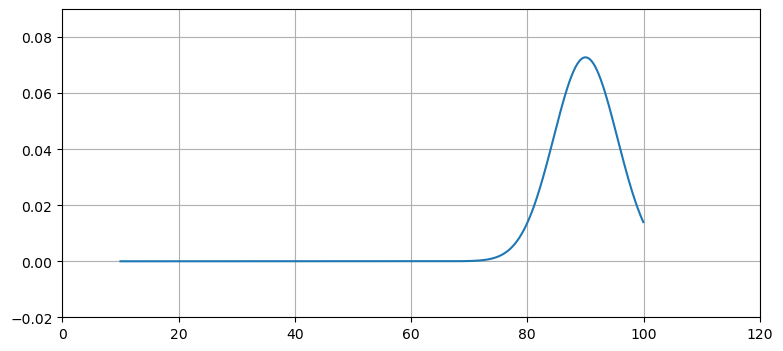

In [234]:
xs = np.arange(10, 100, 0.05)
ys = [gaussian(x, 90, 30) for x in xs]
plt.plot(xs, ys, label='var=0.2')
plt.xlim(0, 120)
plt.ylim(-0.02, 0.09);

The area under the curve cannot equal 1, so it is not a probability distribution. What actually happens is that more students than predicted by a normal distribution get scores nearer the upper end of the range (for example), and that tail becomes “fat”. Also, the test is probably not able to perfectly distinguish minute differences in skill in the students, so the distribution to the left of the mean is also probably a bit bunched up in places. 

Sensors measure the world. The errors in a sensor's measurements are rarely truly Gaussian. It is far too early to be talking about the difficulties that this presents to the Kalman filter designer. It is worth keeping in the back of your mind the fact that the Kalman filter math is based on an idealized model of the world.  For now I will present a bit of code that I will be using later in the book to form distributions to simulate various processes and sensors. This distribution is called the [*Student's $t$-distribution*](https://en.wikipedia.org/wiki/Student%27s_t-distribution). 

Let's say I want to model a sensor that has some white noise in the output. For simplicity, let's say the signal is a constant 10, and the standard deviation of the noise is 2. We can use the function `numpy.random.randn()` to get a random number with a mean of 0 and a standard deviation of 1. I can simulate this with:

Площадь под кривой не может равняться 1, поэтому это не распределение вероятностей. На самом деле происходит так, что больше учеников, чем предсказывает нормальное распределение, получают баллы ближе к верхнему пределу диапазона (например), и этот хвост становится «толстым». Кроме того, тест, вероятно, не способен идеально различать мельчайшие различия в навыках учеников, поэтому распределение слева от среднего также, вероятно, немного сгруппировано в некоторых местах.

Датчики измеряют мир. Ошибки в измерениях датчика редко бывают действительно гауссовыми. Пока еще слишком рано говорить о трудностях, которые это представляет для разработчика фильтра Калмана. Стоит помнить о том, что математика фильтра Калмана основана на идеализированной модели мира. Сейчас я представлю немного кода, который буду использовать позже в книге для формирования распределений для моделирования различных процессов и датчиков. Это распределение называется [*$t$-распределением Стьюдента*](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

Допустим, я хочу смоделировать датчик, на выходе которого присутствует белый шум. Для простоты предположим, что сигнал — это константа 10, а стандартное отклонение шума — 2. Мы можем использовать функцию `numpy.random.randn()`, чтобы получить случайное число со средним значением 0 и стандартным отклонением 1. Я могу смоделировать это с помощью:

In [235]:
from numpy.random import randn
def sense():
    return 10 + randn()*2

Let's plot that signal and see what it looks like.

Давайте построим график этого сигнала и посмотрим, как он выглядит.

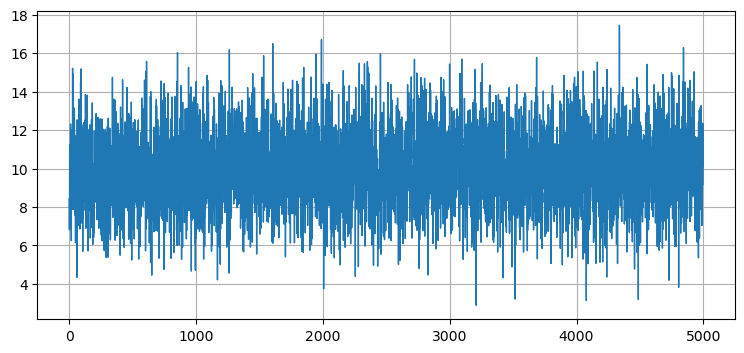

In [236]:
zs = [sense() for i in range(5000)]
plt.plot(zs, lw=1);

That looks like what I would expect. The signal is centered around 10. A standard deviation of 2 means that 68% of the measurements will be within $\pm$ 2 of 10, and 99% will be within $\pm$ 6 of 10, and that looks like what is happening. 

Now let's look at distribution generated with the Student's $t$-distribution. I will not go into the math, but just give you the source code for it and then plot a distribution using it.

Похоже, что я ожидал. Сигнал сосредоточен около 10. Среднеквадратичное отклонение 2 означает, что 68% измерений будут в пределах $\pm$ 2 из 10, а 99% будут в пределах $\pm$ 6 из 10, и это похоже на то, что происходит.

Теперь давайте посмотрим на распределение, сгенерированное с помощью $t$-распределения Стьюдента. Я не буду вдаваться в математику, а просто дам вам исходный код для него, а затем построю распределение с его помощью.

In [237]:
import random
import math

def rand_student_t(df, mu=0, std=1):
    """return random number distributed by Student's t 
    distribution with `df` degrees of freedom with the 
    specified mean and standard deviation.
    """
    x = random.gauss(0, std)
    y = 2.0*random.gammavariate(0.5*df, 2.0)
    return x / (math.sqrt(y / df)) + mu

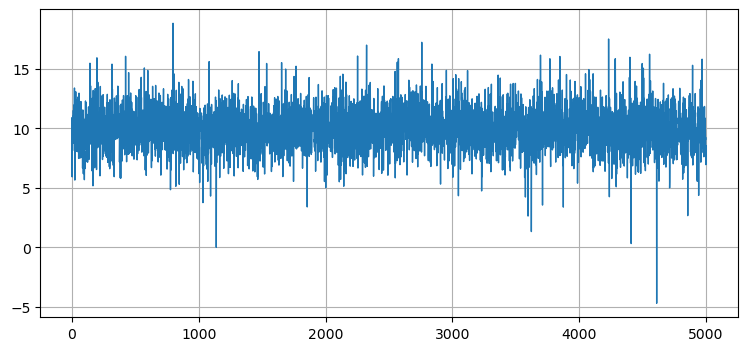

In [238]:
def sense_t():
    return 10 + rand_student_t(7)*2

zs = [sense_t() for i in range(5000)]
plt.plot(zs, lw=1);

We can see from the plot that while the output is similar to the normal distribution there are outliers that go far more than 3 standard deviations from the mean (7 to 13). 

It is unlikely that the Student's $t$-distribution is an accurate model of how your sensor (say, a GPS or Doppler) performs, and this is not a book on how to model physical systems. However, it does produce reasonable data to test your filter's performance when presented with real world noise. We will be using distributions like these throughout the rest of the book in our simulations and tests. 

This is not an idle concern. The Kalman filter equations assume the noise is normally distributed, and perform sub-optimally if this is not true. Designers for mission critical filters, such as the filters on spacecraft, need to master a lot of theory and empirical knowledge about the performance of the sensors on their spacecraft. For example, a presentation I saw on a NASA mission stated that while theory states that they should use 3 standard deviations to distinguish noise from valid measurements in practice they had to use 5 to 6 standard deviations. This was something they determined by experiments.

The code for rand_student_t is included in `filterpy.stats`. You may use it with

```python
from filterpy.stats import rand_student_t
```

While I'll not cover it here, statistics has defined ways of describing the shape of a probability distribution by how it varies from an exponential distribution. The normal distribution is shaped symmetrically around the mean - like a bell curve. However, a probability distribution can be asymmetrical around the mean. The measure of this is called [*skew*](https://en.wikipedia.org/wiki/Skewness). The tails can be shortened, fatter, thinner, or otherwise shaped differently from an exponential distribution. The measure of this is called [*kurtosis*](https://en.wikipedia.org/wiki/Kurtosis). the `scipy.stats` module contains the function `describe` which computes these statistics, among others.

Из графика видно, что, хотя выходные данные похожи на нормальное распределение, есть выбросы, которые выходят за пределы среднего значения более чем на 3 стандартных отклонения (от 7 до 13).

Маловероятно, что распределение $t$ Стьюдента является точной моделью того, как работает ваш датчик (например, GPS или Доплера), и эта книга не о том, как моделировать физические системы. Тем не менее, оно выдает разумные данные для проверки производительности вашего фильтра при наличии шума реального мира. Мы будем использовать такие распределения на протяжении всей оставшейся части книги в наших симуляциях и тестах.

Это не праздное беспокойство. Уравнения фильтра Калмана предполагают, что шум распределен нормально, и работают неоптимально, если это не так. Разработчикам критически важных фильтров, таких как фильтры на космических кораблях, необходимо освоить много теоретических и эмпирических знаний о производительности датчиков на своих космических кораблях. Например, в презентации, которую я видел на миссии NASA, говорилось, что, хотя теория гласит, что они должны использовать 3 стандартных отклонения для различения шума от действительных измерений, на практике им приходилось использовать от 5 до 6 стандартных отклонений. Это было то, что они определили экспериментально.

Код для rand_student_t включен в `filterpy.stats`. Вы можете использовать его с

```python
из filterpy.stats import rand_student_t
```

Хотя я не буду здесь это раскрывать, статистика определила способы описания формы распределения вероятностей по тому, как она отличается от экспоненциального распределения. Нормальное распределение симметрично относительно среднего значения — как колоколообразная кривая. Однако распределение вероятностей может быть асимметричным относительно среднего значения. Мера этого называется [*перекос*](https://en.wikipedia.org/wiki/Skewness). Хвосты могут быть короче, толще, тоньше или иным образом иметь форму, отличную от экспоненциального распределения. Мера этого называется [*эксцесс*](https://en.wikipedia.org/wiki/Эксцесс). Модуль `scipy.stats` содержит функцию `describe`, которая вычисляет эти статистические данные, среди прочего.

In [239]:
import scipy
scipy.stats.describe(zs)

DescribeResult(nobs=5000, minmax=(-4.701622995463941, 18.82165416938283), mean=10.012547094532632, variance=2.776411002970431, skewness=-0.15909540145788395, kurtosis=2.7990104107775826)

Let's examine two normal populations, one small, one large:

Давайте рассмотрим две нормальные популяции, одну маленькую и одну большую:

In [240]:
print(scipy.stats.describe(np.random.randn(10)))
print()
print(scipy.stats.describe(np.random.randn(300000)))

DescribeResult(nobs=10, minmax=(-1.197878605305119, 1.6482242139779084), mean=0.6087613510921515, variance=0.7254839823241316, skewness=-0.6967122029425817, kurtosis=0.08546033259491637)

DescribeResult(nobs=300000, minmax=(-4.388702315191343, 4.8775681721609665), mean=0.0021124703791669305, variance=0.9959384001756934, skewness=0.004828144866866633, kurtosis=-0.011625042884956471)


The small sample has very non-zero skew and kurtosis because the small number of samples is not well distributed around the mean of 0. You can see this also by comparing the computed mean and variance with the theoretical mean of 0 and variance 1. In comparison the large sample's mean and variance are very close to the theoretical values, and both the skew and kurtosis are near zero.

Небольшая выборка имеет очень ненулевые асимметрию и эксцесс, поскольку небольшое количество выборок неравномерно распределено вокруг среднего значения 0. Это можно увидеть, сравнив вычисленное среднее значение и дисперсию с теоретическим средним значением 0 и дисперсией 1. Для сравнения, среднее значение и дисперсия большой выборки очень близки к теоретическим значениям, а асимметрия и эксцесс близки к нулю.

## Product of Gaussians (Optional)

It is not important to read this section. Here I derive the equations for the product of two Gaussians.

You can find this result by multiplying the equation for two Gaussians together and combining terms. The algebra gets messy. I will derive it using Bayes theorem. We can state the problem as: let the prior be $N(\bar\mu, \bar\sigma^2)$, and measurement be $z \propto N(z, \sigma_z^2)$. What is the posterior  x given the measurement z?

Неважно читать этот раздел. Здесь я вывожу уравнения для произведения двух гауссианов.

Вы можете найти этот результат, умножив уравнения для двух гауссианов и объединив члены. Алгебра становится запутанной. Я выведу его с помощью теоремы Байеса. Мы можем сформулировать задачу так: пусть априорное значение будет $N(\bar\mu, \bar\sigma^2)$, а измерение будет $z \propto N(z, \sigma_z^2)$. Чему равно апостериорное значение x при заданном измерении z?

Write the posterior as $p(x \mid z)$. Now we can use Bayes Theorem to state

Запишите апостериорную вероятность как $p(x \mid z)$. Теперь мы можем использовать теорему Байеса, чтобы сформулировать

$$p(x \mid z) = \frac{p(z \mid x)p(x)}{p(z)}$$

$p(z)$ is a normalizing constant, so we can create a proportinality

$p(z)$ — нормализующая константа, поэтому мы можем создать пропорциональность

$$p(x \mid z) \propto p(z|x)p(x)$$

Now we subtitute in the equations for the Gaussians, which are

Теперь подставим в уравнения гауссианы, которые имеют вид

$$p(z \mid x) = \frac{1}{\sqrt{2\pi\sigma_z^2}}\exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}\Big]$$

$$p(x) = \frac{1}{\sqrt{2\pi\bar\sigma^2}}\exp \Big[-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big]$$

We can drop the leading terms, as they are constants, giving us

Мы можем отбросить ведущие члены, так как они являются константами, что дает нам

$$\begin{aligned}
p(x \mid z) &\propto \exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}\Big]\exp \Big[-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big]\\
&\propto \exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big] \\
&\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[\bar\sigma^2(z-x)^2+\sigma_z^2(x-\bar\mu)^2]\Big]
\end{aligned}$$

Now we multiply out the squared terms and group in terms of the posterior $x$.

Теперь перемножаем квадраты членов и группируем по апостериорному $x$.

$$\begin{aligned}
p(x \mid z) &\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[\bar\sigma^2(z^2 -2xz + x^2) + \sigma_z^2(x^2 - 2x\bar\mu+\bar\mu^2)]\Big ] \\
&\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[x^2(\bar\sigma^2+\sigma_z^2)-2x(\sigma_z^2\bar\mu + \bar\sigma^2z) + (\bar\sigma^2z^2+\sigma_z^2\bar\mu^2)]\Big ]
\end{aligned}$$

The last parentheses do not contain the posterior $x$, so it can be treated as a constant and discarded.

Последние скобки не содержат апостериорного $x$, поэтому его можно рассматривать как константу и отбросить.

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{x^2(\bar\sigma^2+\sigma_z^2)-2x(\sigma_z^2\bar\mu + \bar\sigma^2z)}{\sigma_z^2\bar\sigma^2}\Big ]
$$

Divide numerator and denominator by $\bar\sigma^2+\sigma_z^2$ to get

Разделите числитель и знаменатель на $\bar\sigma^2+\sigma_z^2$, чтобы получить

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{x^2-2x(\frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2})}{\frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}}\Big ]
$$

Proportionality allows us create or delete constants at will, so we can factor this into

Пропорциональность позволяет нам создавать или удалять константы по желанию, поэтому мы можем учитывать это в

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{(x-\frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2})^2}{\frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}}\Big ]
$$

A Gaussian is

$$N(\mu,\, \sigma^2) \propto \exp\Big [-\frac{1}{2}\frac{(x - \mu)^2}{\sigma^2}\Big ]$$

So we can see that $p(x \mid z)$ has a mean of

Итак, мы видим, что $p(x \mid z)$ имеет среднее значение

$$\mu_\mathtt{posterior} = \frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2}$$

and a variance of

и дисперсия

$$
\sigma_\mathtt{posterior} = \frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}
$$

I've dropped the constants, and so the result is not a normal, but proportional to one. Bayes theorem normalizes with the $p(z)$ divisor, ensuring that the result is normal. We normalize in the update step of our filters, ensuring the filter estimate is Gaussian.

Я отбросил константы, и поэтому результат не нормальный, а пропорциональный единице. Теорема Байеса нормализуется с помощью делителя $p(z)$, гарантируя, что результат будет нормальным. Мы нормализуем на этапе обновления наших фильтров, гарантируя, что оценка фильтра будет гауссовой.

$$\mathcal N_1 = \| \mathcal N_2\cdot \mathcal N_3\|$$

## Sum of Independent Gaussian Random Variables  (Optional)

Likewise, this section is not important to read. Here I derive the equations for the sum of two independent Gaussian random variables. 

Аналогично, этот раздел не важен для чтения. Здесь я вывожу уравнения для суммы двух независимых гауссовских случайных величин.

The sum is given by

Сумма определяется как

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

There are several proofs for this. I will use convolution since we used convolution in the previous chapter for the histograms of probabilities. 

To find the density function of the sum of two Gaussian random variables we sum the density functions of each. They are nonlinear, continuous functions, so we need to compute the sum with an integral. If the random variables $p$ and $z$ (e.g. prior and measurement) are independent we can compute this with

Для этого есть несколько доказательств. Я буду использовать свертку, поскольку мы использовали свертку в предыдущей главе для гистограмм вероятностей.

Чтобы найти функцию плотности суммы двух гауссовских случайных величин, мы суммируем функции плотности каждой из них. Они являются нелинейными, непрерывными функциями, поэтому нам нужно вычислить сумму с интегралом. Если случайные величины $p$ и $z$ (например, априорная и измеренная) независимы, мы можем вычислить это с помощью

$p(x) = \int\limits_{-\infty}^\infty f_p(x-z)f_z(z)\, dx$

This is the equation for a convolution. Now we just do some math:

Это уравнение для свертки. Теперь просто сделаем некоторые вычисления:

$p(x) = \int\limits_{-\infty}^\infty f_2(x-x_1)f_1(x_1)\, dx$

$=  \int\limits_{-\infty}^\infty 
\frac{1}{\sqrt{2\pi}\sigma_z}\exp\left[-\frac{(x - z - \mu_z)^2}{2\sigma^2_z}\right]
\frac{1}{\sqrt{2\pi}\sigma_p}\exp\left[-\frac{(x - \mu_p)^2}{2\sigma^2_p}\right] \, dx$

$=  \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

$= \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right] \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

The expression inside the integral is a normal distribution. The sum of a normal distribution is one, hence the integral is one. This gives us

Выражение внутри интеграла — это нормальное распределение. Сумма нормального распределения равна единице, следовательно, интеграл равен единице. Это дает нам

$$p(x) = \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]$$

This is in the form of a normal, where

Это в форме нормы, где

$$\begin{gathered}\mu_x = \mu_p + \mu_z \\
\sigma_x^2 = \sigma_z^2+\sigma_p^2\, \square\end{gathered}$$

## Summary and Key Points

This chapter is a poor introduction to statistics in general. I've only covered the concepts that  needed to use Gaussians in the remainder of the book, no more. What I've covered will not get you very far if you intend to read the Kalman filter literature. If this is a new topic to you I suggest reading a statistics textbook. I've always liked the Schaum series for self study, and Alan Downey's *Think Stats* [5] is also very good and freely available online. 

The following points **must** be understood by you before we continue:

* Normals express a continuous probability distribution
* They are completely described by two parameters: the mean ($\mu$) and variance ($\sigma^2$)
* $\mu$ is the average of all possible values
* The variance $\sigma^2$ represents how much our measurements vary from the mean
* The standard deviation ($\sigma$) is the square root of the variance ($\sigma^2$)
* Many things in nature approximate a normal distribution, but the math is not perfect.
* In filtering problems computing $p(x\mid z)$ is nearly impossible, but computing $p(z\mid x)$ is straightforward. Bayes' lets us compute the former from the latter. 

The next several chapters will be using Gaussians with Bayes' theorem to help perform filtering. As noted in the last section, sometimes Gaussians do not describe the world very well. Latter parts of the book are dedicated to filters which work even when the noise or system's behavior is very non-Gaussian. 

Эта глава — плохое введение в статистику в целом. Я рассмотрел только концепции, необходимые для использования гауссианов в оставшейся части книги, не более. То, что я рассмотрел, не поможет вам продвинуться далеко, если вы собираетесь читать литературу по фильтру Калмана. Если это новая для вас тема, я предлагаю прочитать учебник по статистике. Мне всегда нравилась серия Шаума для самостоятельного изучения, а *Think Stats* Алана Дауни [5] также очень хорош и свободно доступен в сети.

Следующие пункты **должны** быть вами поняты, прежде чем мы продолжим:

* Нормали выражают непрерывное распределение вероятностей
* Они полностью описываются двумя параметрами: средним значением ($\mu$) и дисперсией ($\sigma^2$)
* $\mu$ — это среднее значение всех возможных значений
* Дисперсия $\sigma^2$ показывает, насколько наши измерения отличаются от среднего
* Среднеквадратическое отклонение ($\sigma$) — это квадратный корень дисперсии ($\sigma^2$)
* Многие вещи в природе приближаются к нормальному распределению, но математика не идеальна.
* В задачах фильтрации вычисление $p(x\mid z)$ практически невозможно, но вычисление $p(z\mid x)$ — это просто. Байес позволяет нам вычислять первое из второго.

В следующих нескольких главах мы будем использовать гауссовы функции с теоремой Байеса для выполнения фильтрации. Как отмечалось в последнем разделе, иногда гауссовы функции не очень хорошо описывают мир. Последние части книги посвящены фильтрам, которые работают даже в тех случаях, когда шум или поведение системы сильно отличается от гауссовского.

## References

[1] https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb

[2] http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[3] http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

[4] Huber, Peter J. *Robust Statistical Procedures*, Second Edition. Society for Industrial and Applied Mathematics, 1996.

[5] Downey, Alan. *Think Stats*, Second Edition. O'Reilly Media.

https://github.com/AllenDowney/ThinkStats2

http://greenteapress.com/thinkstats/

## Useful Wikipedia Links

https://en.wikipedia.org/wiki/Probability_distribution

https://en.wikipedia.org/wiki/Random_variable

https://en.wikipedia.org/wiki/Sample_space

https://en.wikipedia.org/wiki/Central_tendency

https://en.wikipedia.org/wiki/Expected_value

https://en.wikipedia.org/wiki/Standard_deviation

https://en.wikipedia.org/wiki/Variance

https://en.wikipedia.org/wiki/Probability_density_function

https://en.wikipedia.org/wiki/Central_limit_theorem

https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

https://en.wikipedia.org/wiki/Cumulative_distribution_function

https://en.wikipedia.org/wiki/Skewness

https://en.wikipedia.org/wiki/Kurtosis